In [43]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Exploratory Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
hi_df = pd.read_csv(r"C:\Users\agbol\Downloads\Money_Laundering_Detection\HI-Small_Trans.csv")
hi_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [3]:
new_column_names = {
    'Timestamp': 'Timestamp',
    'From Bank': 'From_Bank',
    'Account': 'From_Account',
    'To Bank': 'To_Bank',
    'Account.1': 'To_Account',
    'Amount Received': 'Amount_Received',
    'Receiving Currency': 'Receiving_Currency',
    'Amount Paid': 'Amount_Paid',
    'Payment Currency': 'Payment_Currency',
    'Payment Format': 'Payment_Format',
    'Is Laundering': 'Is_Laundering'
}

# Rename the columns
hi_df = hi_df.rename(columns=new_column_names)

hi_df.head()

,Timestamp,From_Bank,From_Account,To_Bank,To_Account,Amount_Received,Receiving_Currency,Amount_Paid,Payment_Currency,Payment_Format,Is_Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [4]:
# Convert necessary columns to categorical data type
hi_df['Is_Laundering'] = hi_df['Is_Laundering'].astype('category')
hi_df['From_Bank'] = hi_df['From_Bank'].astype('category')
hi_df['To_Bank'] = hi_df['To_Bank'].astype('category')
hi_df['Receiving_Currency'] = hi_df['Receiving_Currency'].astype('category')
hi_df['Payment_Currency'] = hi_df['Payment_Currency'].astype('category')
hi_df['Payment_Format'] = hi_df['Payment_Format'].astype('category')


print(hi_df.dtypes)


Timestamp               object
From_Bank             category
From_Account            object
To_Bank               category
To_Account              object
Amount_Received        float64
Receiving_Currency    category
Amount_Paid            float64
Payment_Currency      category
Payment_Format        category
Is_Laundering         category
dtype: object


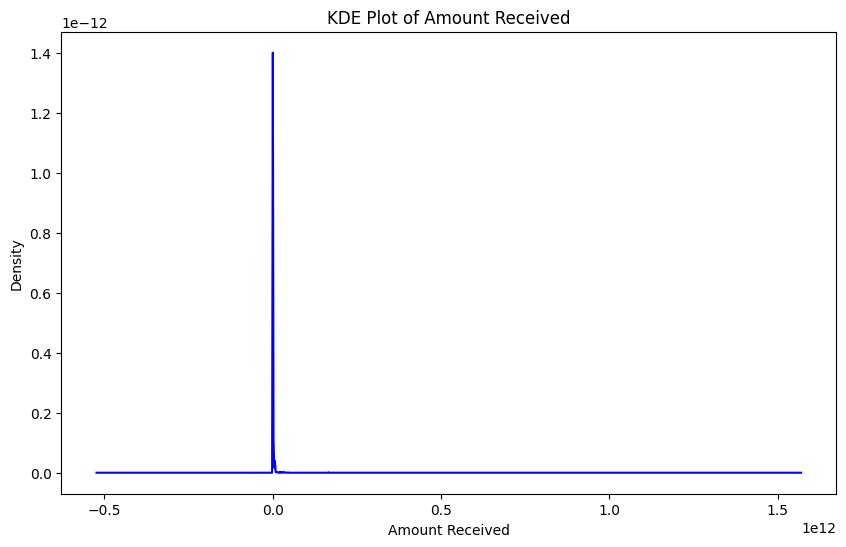

In [5]:
# Plot KDE for 'Amount Received'
plt.figure(figsize=(10, 6))
hi_df['Amount_Received'].plot(kind='kde', color='blue')
plt.title('KDE Plot of Amount Received')
plt.xlabel('Amount Received')
plt.show()

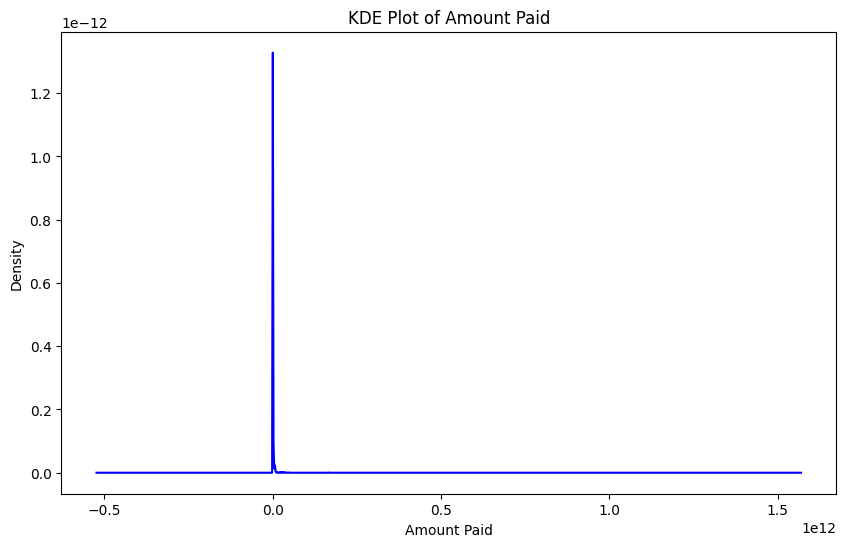

In [29]:
# Plot KDE for 'Amount Received'
plt.figure(figsize=(10, 6))
hi_df['Amount_Paid'].plot(kind='kde', color='blue')
plt.title('KDE Plot of Amount Paid')
plt.xlabel('Amount Paid')
plt.show()

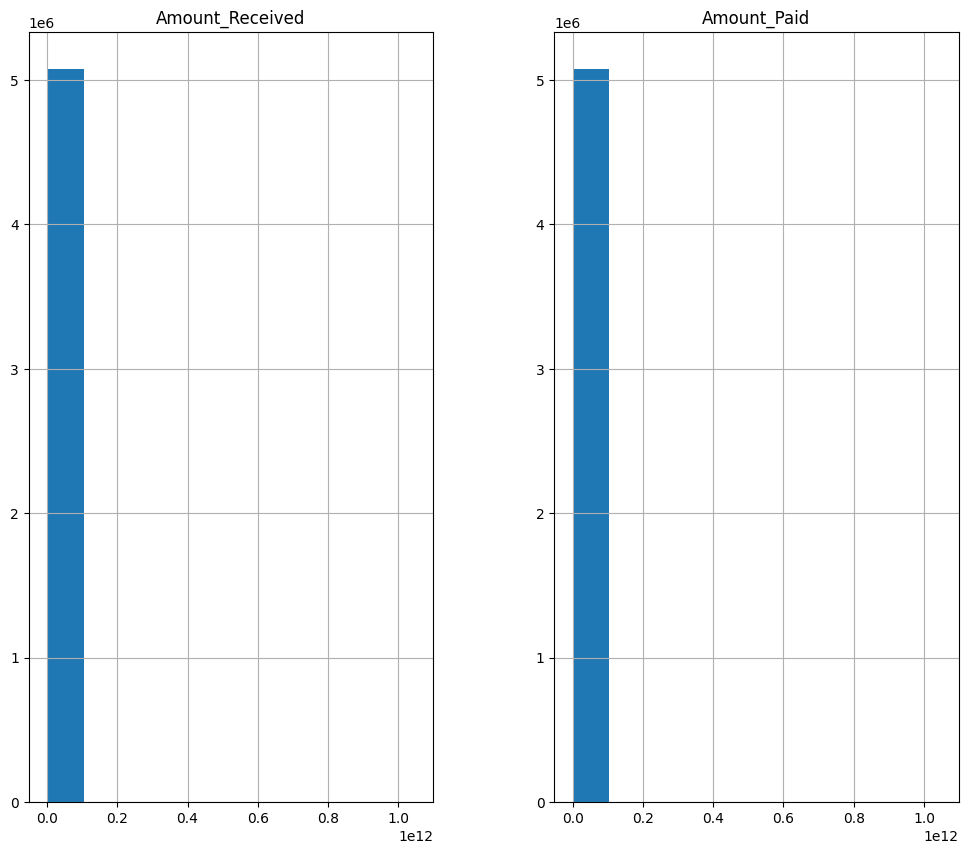

In [45]:
# Plot histograms for numerical columns to understand their distributions
hi_df.hist(figsize=(12, 10))
plt.show()

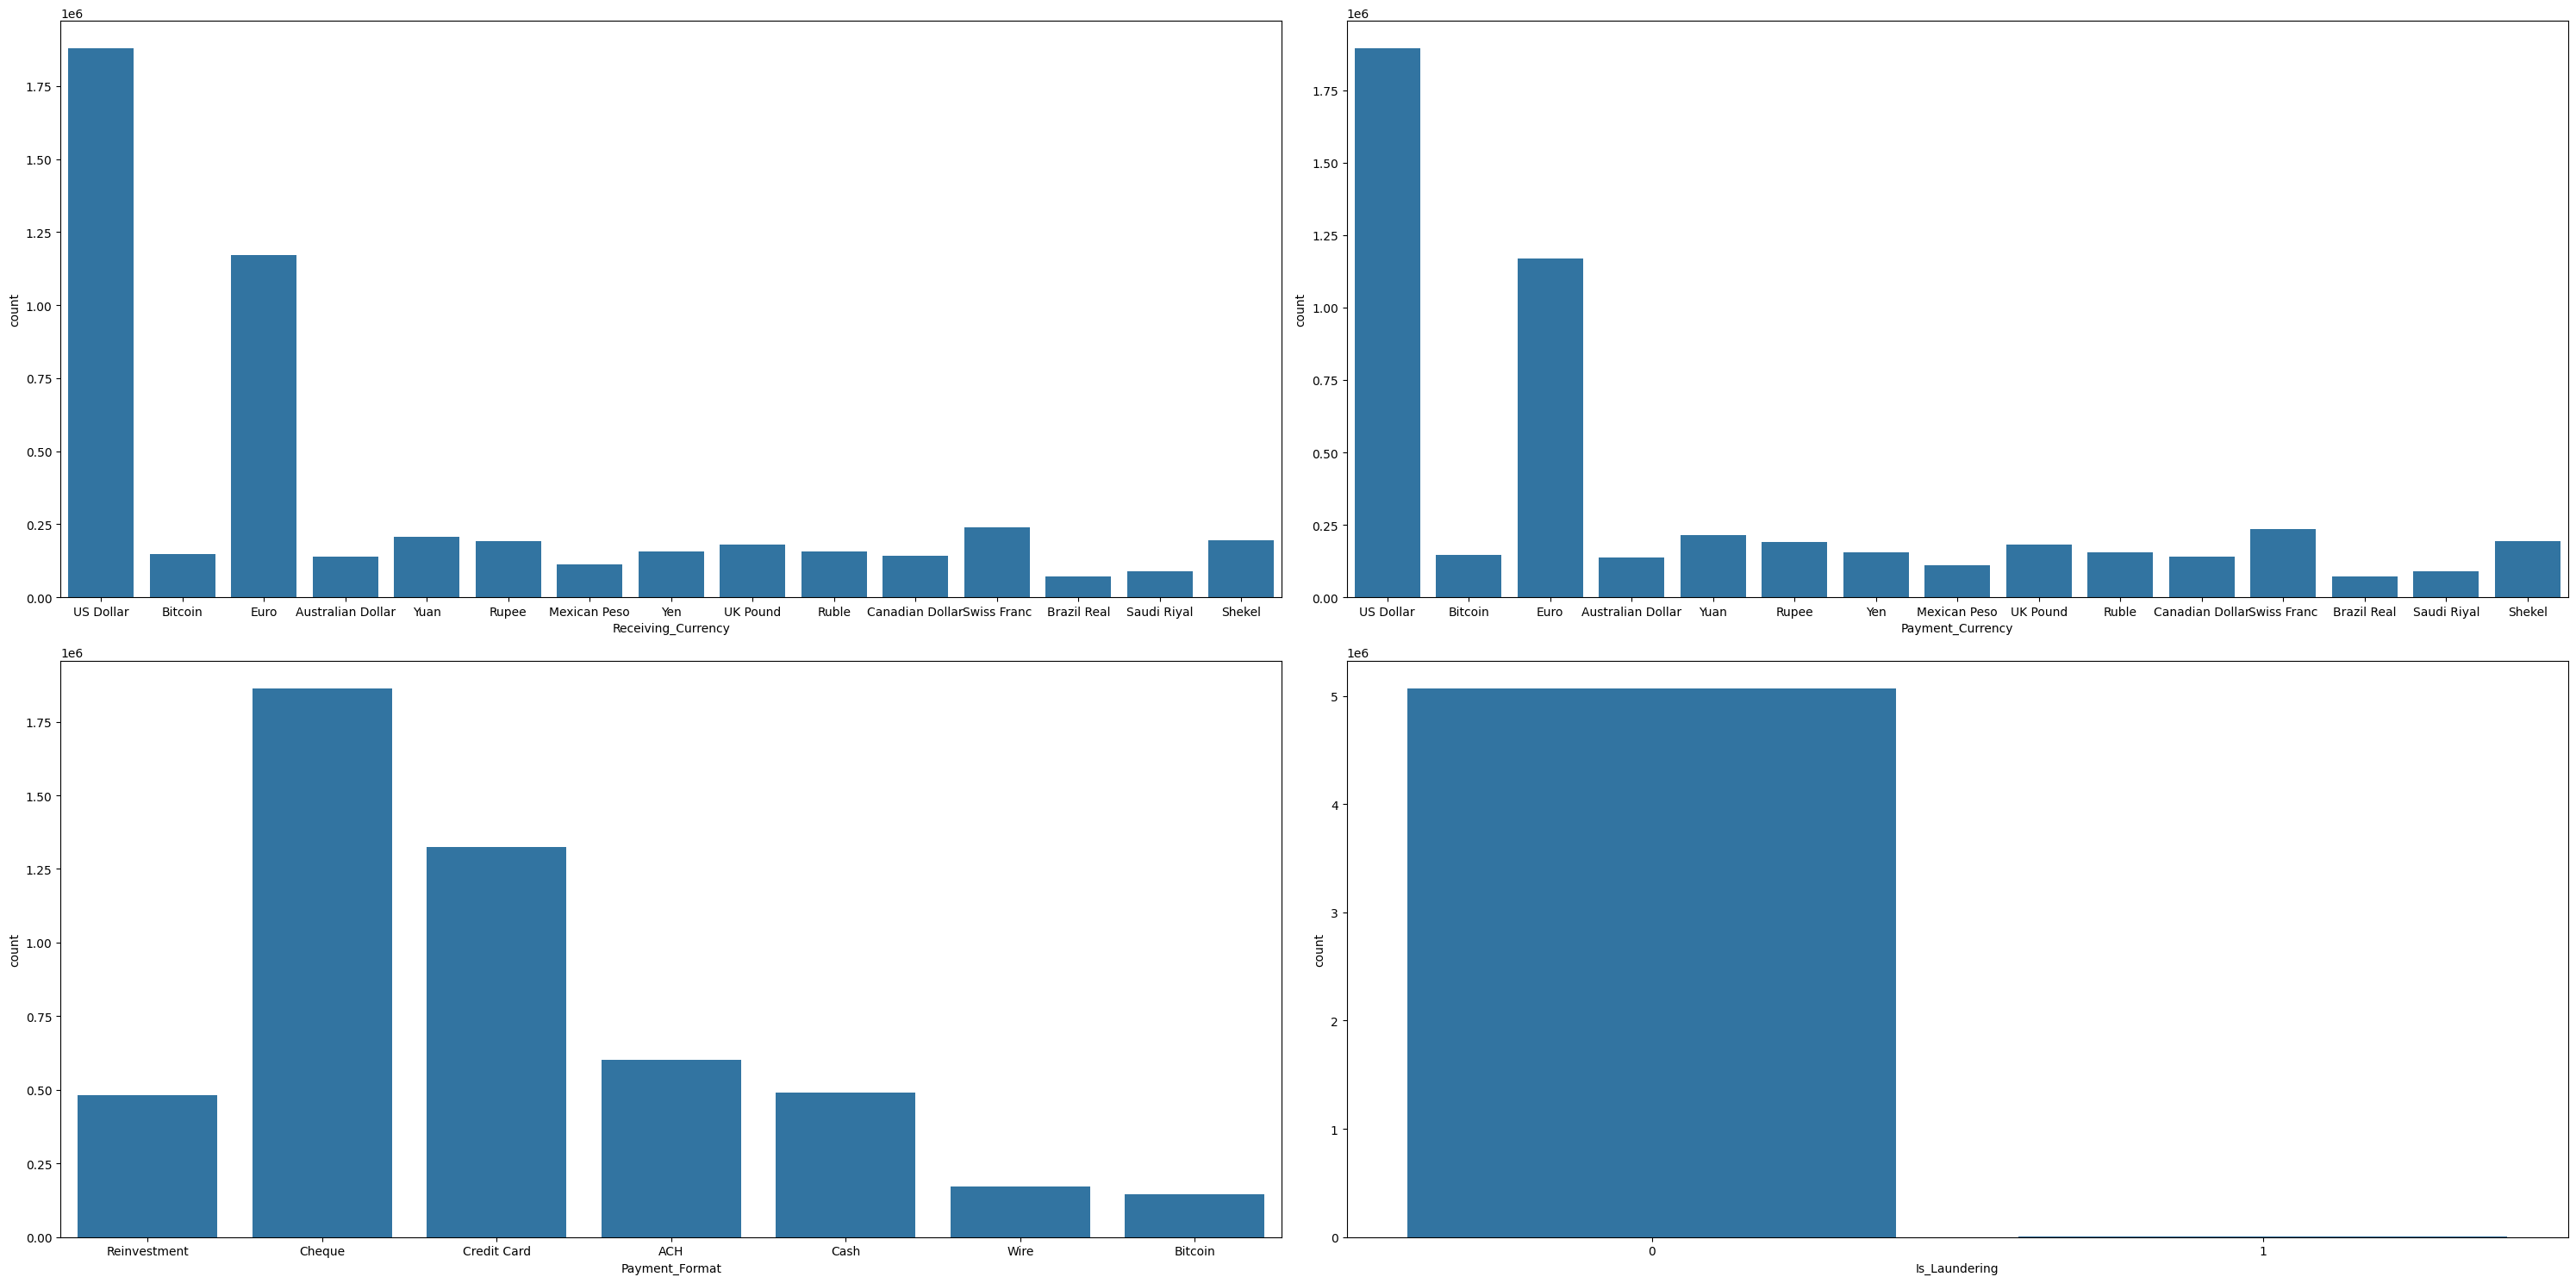

In [64]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

# Plot bar charts for the specified categorical columns
sns.countplot(x='Receiving_Currency', data=hi_df, ax=axes[0, 0])
sns.countplot(x='Payment_Currency', data=hi_df, ax=axes[0, 1])
sns.countplot(x='Payment_Format', data=hi_df, ax=axes[1, 0])
sns.countplot(x='Is_Laundering', data=hi_df, ax=axes[1, 1])



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

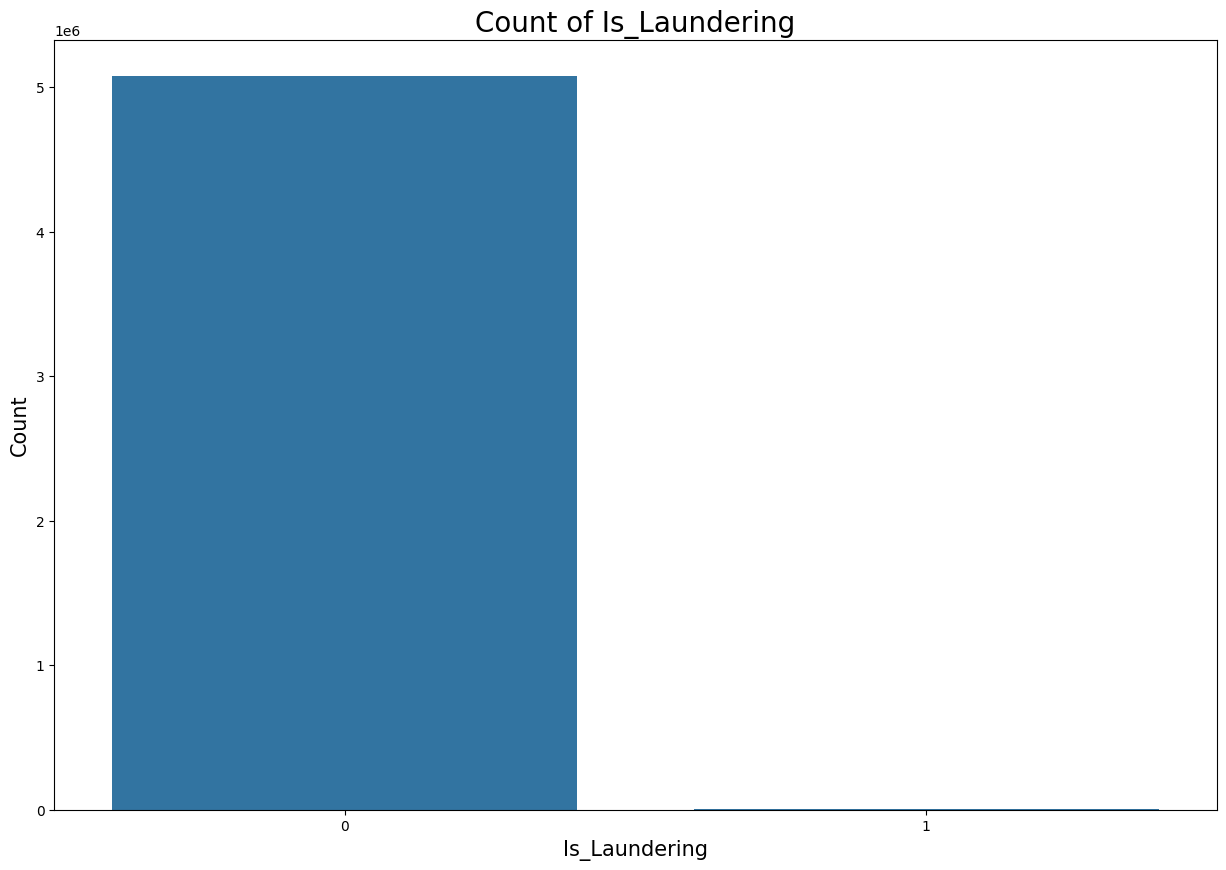

In [65]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot a bar chart for the 'Is_Laundering' column
sns.countplot(x='Is_Laundering', data=hi_df, ax=ax)

# Set the title and labels
ax.set_title('Count of Is_Laundering', fontsize=20)
ax.set_xlabel('Is_Laundering', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Show the plot
plt.show()

In [12]:
# Analyze transactions marked as money laundering
laundering_data = hi_df[hi_df['Is_Laundering'] == 1]
non_laundering_data = hi_df[hi_df['Is_Laundering'] == 0]

In [61]:
print(hi_df.dtypes)

Timestamp             datetime64[ns]
From_Bank                      int64
From_Account                  object
To_Bank                        int64
To_Account                    object
Amount_Received              float64
Receiving_Currency            object
Amount_Paid                  float64
Payment_Currency              object
Payment_Format                object
Is_Laundering                  int64
dtype: object


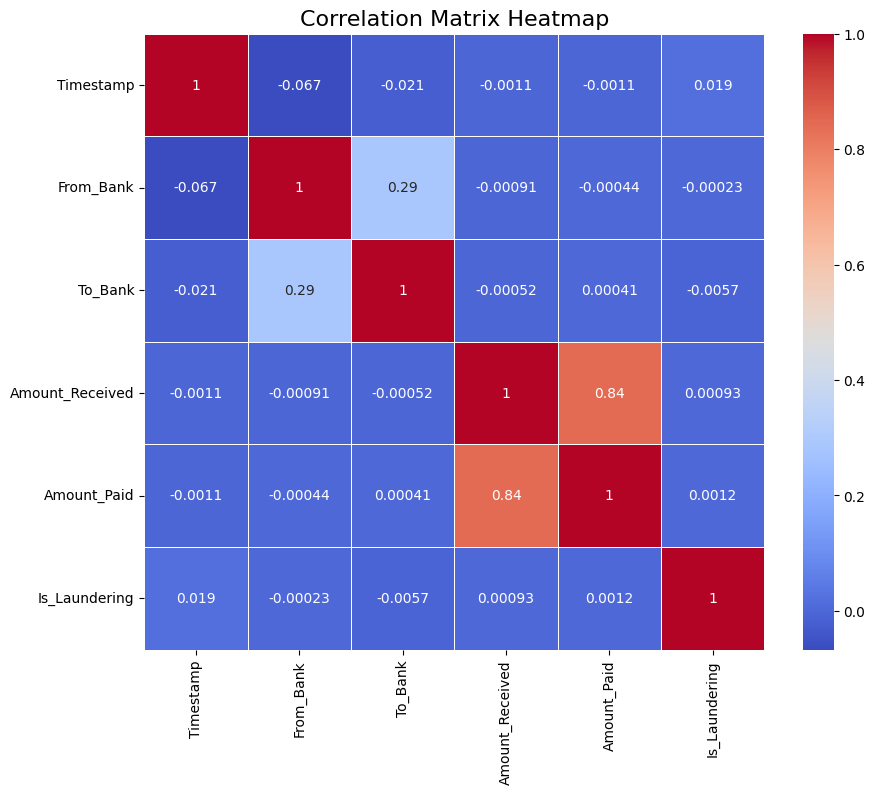

In [62]:
numeric_columns = ['Timestamp','From_Bank','To_Bank','Amount_Received', 'Amount_Paid','Is_Laundering']
hi_df[numeric_columns] = hi_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix for numerical columns
corr_matrix = hi_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [15]:
from scipy.stats import gaussian_kde

# Drop NA values and extract the column
data = hi_df['Amount Received'].dropna().values

# Calculate the KDE
kde = gaussian_kde(data)

# Generate a range of values over which to evaluate the KDE
x_range = np.linspace(data.min(), data.max(), 1000)
kde_values = kde(x_range)

# Find the peak (maximum) of the KDE
peak_index = np.argmax(kde_values)
peak_value = x_range[peak_index]


print(f'The peak value of in the KDE plot is around: {peak_value:.16f}')


The peak value of in the KDE plot is around: 0.0000010000000000


In [14]:
# Calculate standard deviation
std_dev = np.std(data)

# Define a range around the peak value (e.g., within one standard deviation)
lower_bound = peak_value - std_dev
upper_bound = peak_value + std_dev

# Extract values within this range
values_around_peak = hi_df[(hi_df['Amount Received'] >= lower_bound) & (hi_df['Amount Received'] <= upper_bound)]['Amount Received']

#print(f'Values around the peak of {'Amount Received'}:')
print(values_around_peak)


0           3697.340000
1              0.010000
2          14675.570000
3           2806.970000
4          36682.970000
               ...     
5078340        0.154978
5078341        0.108128
5078342        0.004988
5078343        0.038417
5078344        0.281983
Name: Amount Received, Length: 5075402, dtype: float64


In [9]:
column_name = 'Amount Received'
lower_bound = np.percentile(hi_df[column_name], 2.5)
upper_bound = np.percentile(hi_df[column_name], 97.5)

print(f'Approximate value range for {column_name}: [{lower_bound}, {upper_bound}]')


Approximate value range for Amount Received: [0.39, 2491812.0]


In [20]:
import numpy as np
import pandas as pd



# Select numeric columns (including both int64 and float64 types)
numeric_columns = hi_df.select_dtypes(include=['int64', 'float64'])

# Calculate mean, median, and mode for each numeric column
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]

# Print the results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)


Mean values:
 From Bank          4.573057e+04
To Bank            6.574456e+04
Amount Received    5.988726e+06
Amount Paid        4.509273e+06
Is Laundering      1.019427e-03
dtype: float64

Median values:
 From Bank           9679.00
To Bank            21568.00
Amount Received     1411.01
Amount Paid         1414.54
Is Laundering          0.00
dtype: float64

Mode values:
 From Bank          70.00
To Bank            10.00
Amount Received     0.01
Amount Paid         0.01
Is Laundering       0.00
Name: 0, dtype: float64


In [23]:
count_0_1 = (hi_df['Amount Received'] == 0.1).sum()
print(f"Count of 0.1 in 'Amount Received': {count_0_1}")

Count of 0.1 in 'Amount Received': 307


In [24]:
mean_value = hi_df['Amount Received'].mean()
median_value = hi_df['Amount Received'].median()
mode_value = hi_df['Amount Received'].mode().iloc[0]

print(f"Mean: {mean_value:.2f}, Median: {median_value:.2f}, Mode: {mode_value:.2f}")


Mean: 5988726.07, Median: 1411.01, Mode: 0.01


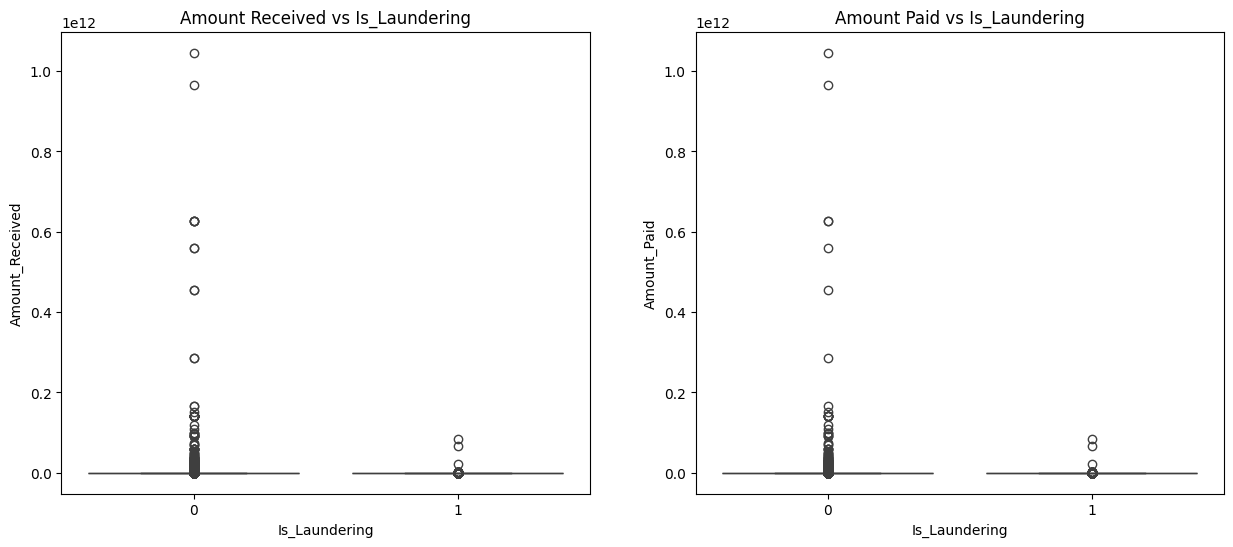

In [31]:
# Plot relationships between numerical columns and Is_Laundering
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Is_Laundering', y='Amount_Received', data=hi_df, ax=axes[0])
axes[0].set_title('Amount Received vs Is_Laundering')
sns.boxplot(x='Is_Laundering', y='Amount_Paid', data=hi_df, ax=axes[1])
axes[1].set_title('Amount Paid vs Is_Laundering')
plt.show()

C:\Users\agbol\AppData\Local\Temp\ipykernel_4708\3561241345.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
C:\Users\agbol\AppData\Local\Temp\ipykernel_4708\3561241345.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
C:\Users\agbol\AppData\Local\Temp\ipykernel_4708\3561241345.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
C:\Users\agbol\AppData\Local\Temp\ipykernel_4708\3561241345.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')


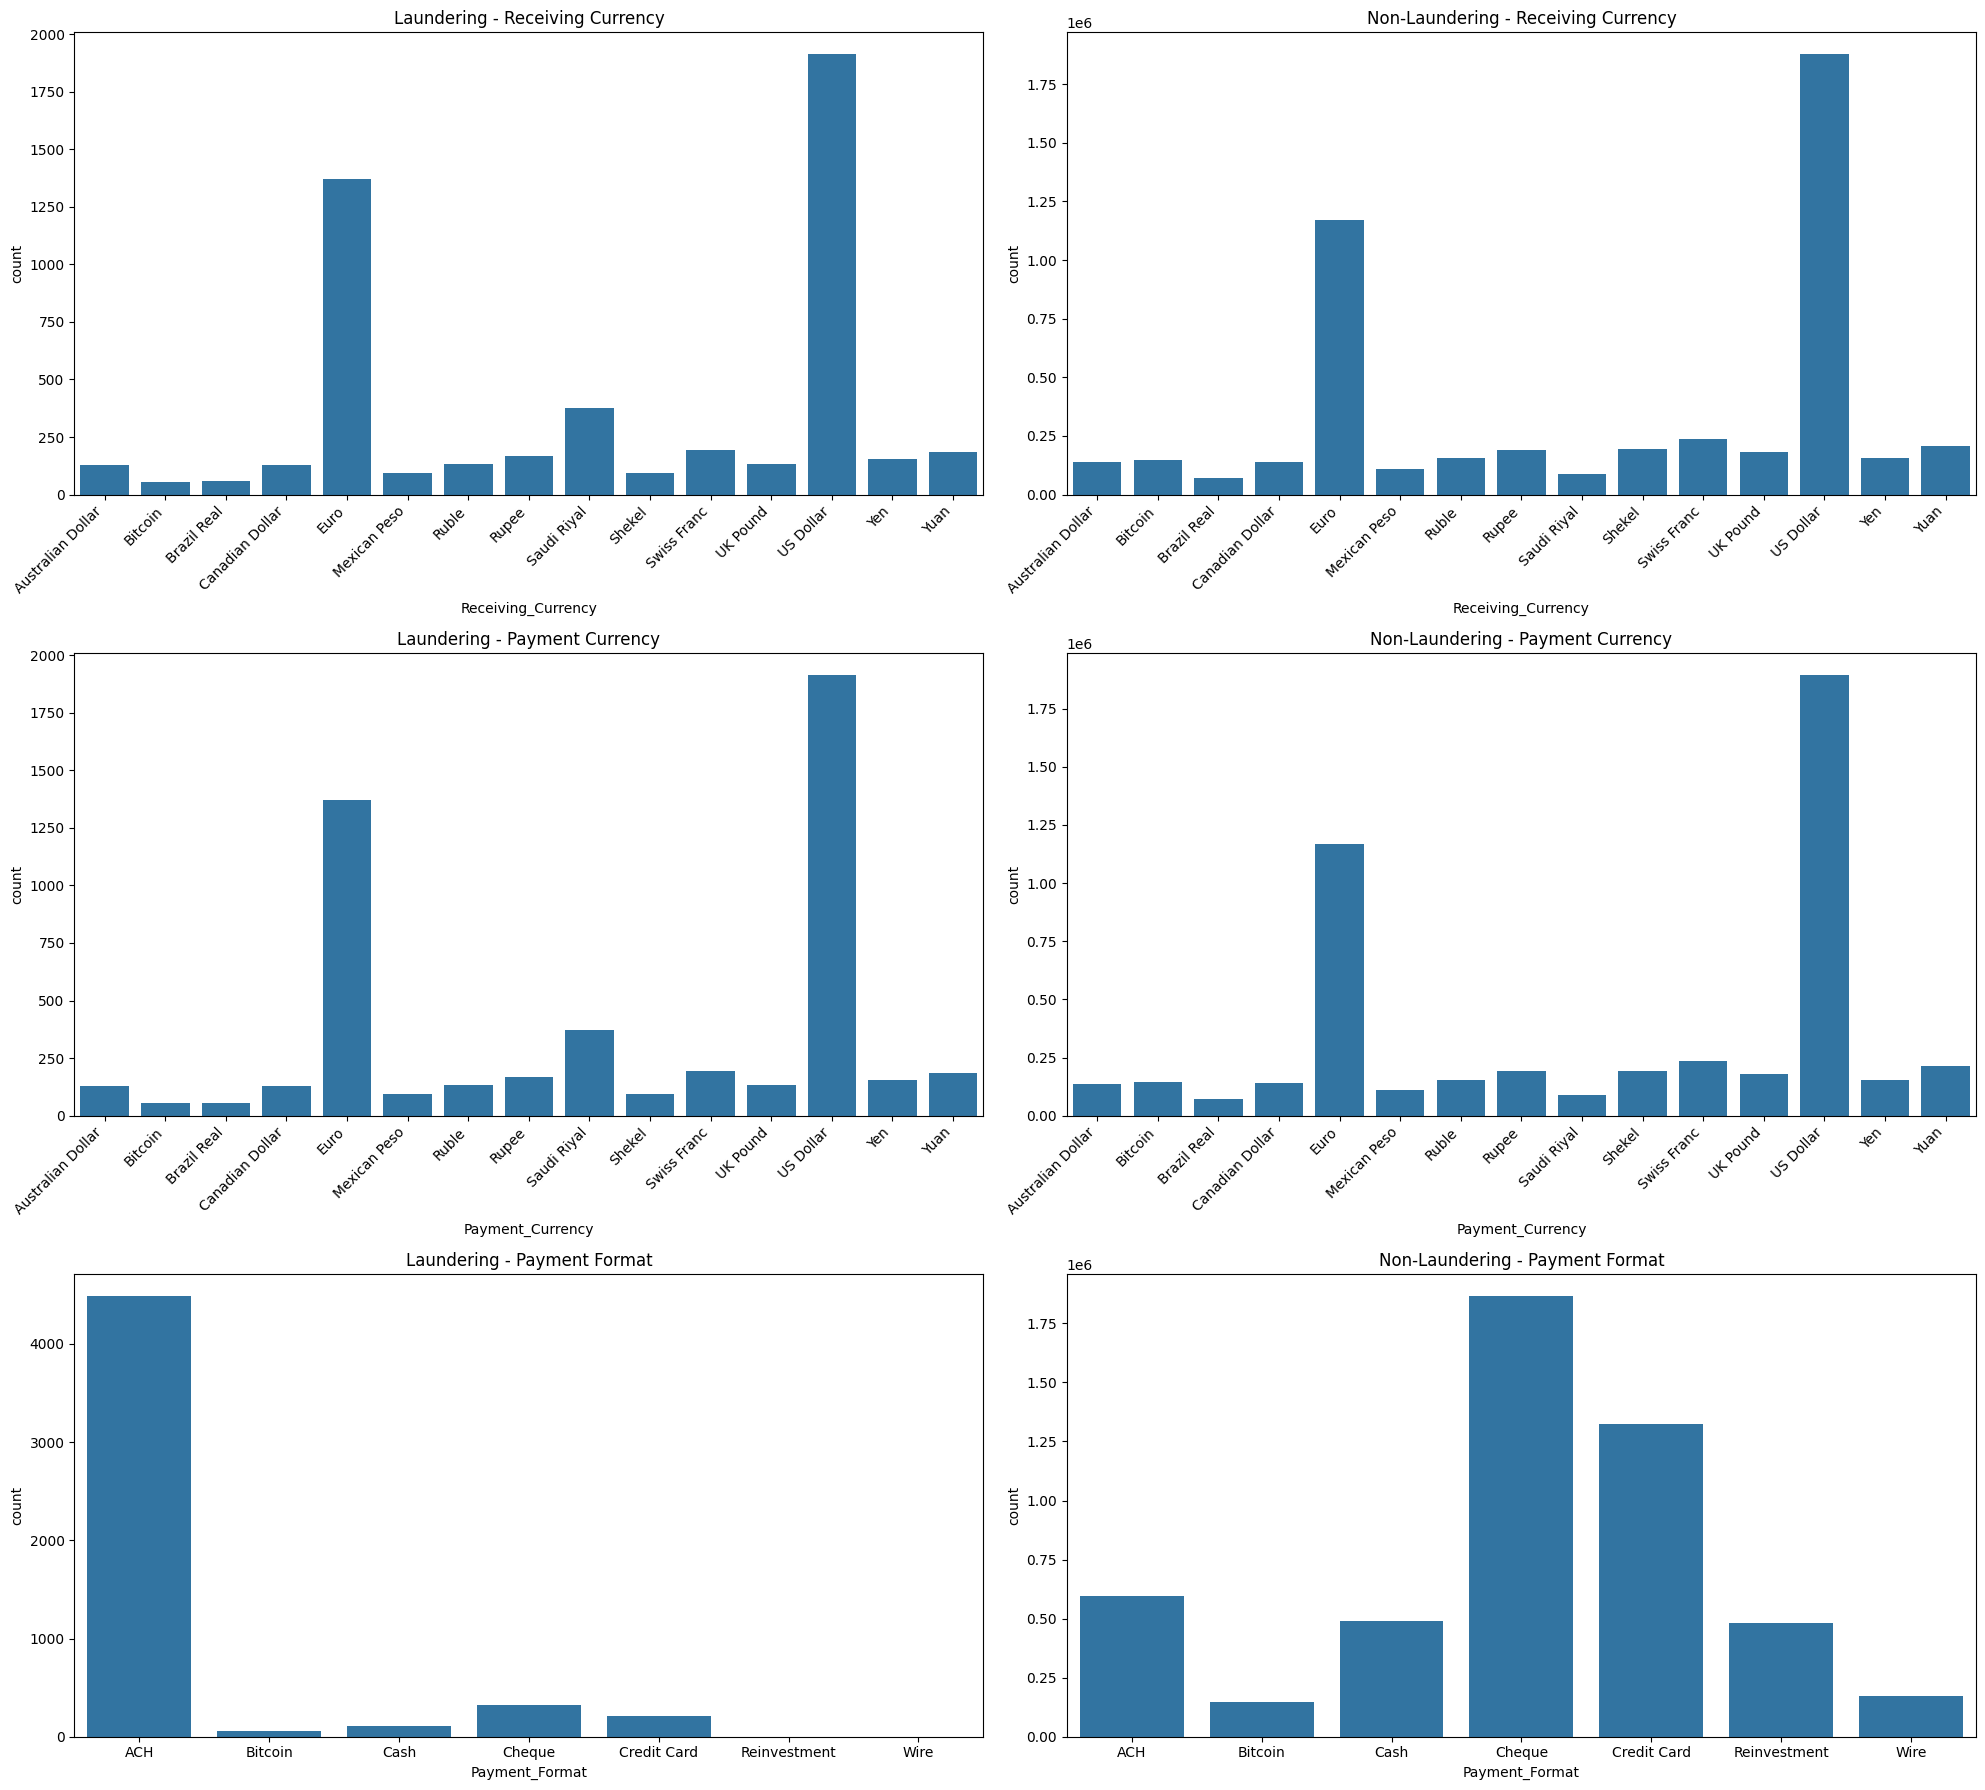

In [36]:
# Filter data for Is_Laundering = 1 and Is_Laundering = 0
laundering_df = hi_df[hi_df['Is_Laundering'] == 1]
non_laundering_df = hi_df[hi_df['Is_Laundering'] == 0]

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Plot relationships for Is_Laundering = 1 (top)
sns.countplot(x='Receiving_Currency', data=laundering_df, ax=axes[0, 0])
axes[0, 0].set_title('Laundering - Receiving Currency')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Payment_Currency', data=laundering_df, ax=axes[1, 0])
axes[1, 0].set_title('Laundering - Payment Currency')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Payment_Format', data=laundering_df, ax=axes[2, 0])
axes[2, 0].set_title('Laundering - Payment Format')

# Plot relationships for Is_Laundering = 0 (bottom)
sns.countplot(x='Receiving_Currency', data=non_laundering_df, ax=axes[0, 1])
axes[0, 1].set_title('Non-Laundering - Receiving Currency')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Payment_Currency', data=non_laundering_df, ax=axes[1, 1])
axes[1, 1].set_title('Non-Laundering - Payment Currency')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Payment_Format', data=non_laundering_df, ax=axes[2, 1])
axes[2, 1].set_title('Non-Laundering - Payment Format')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

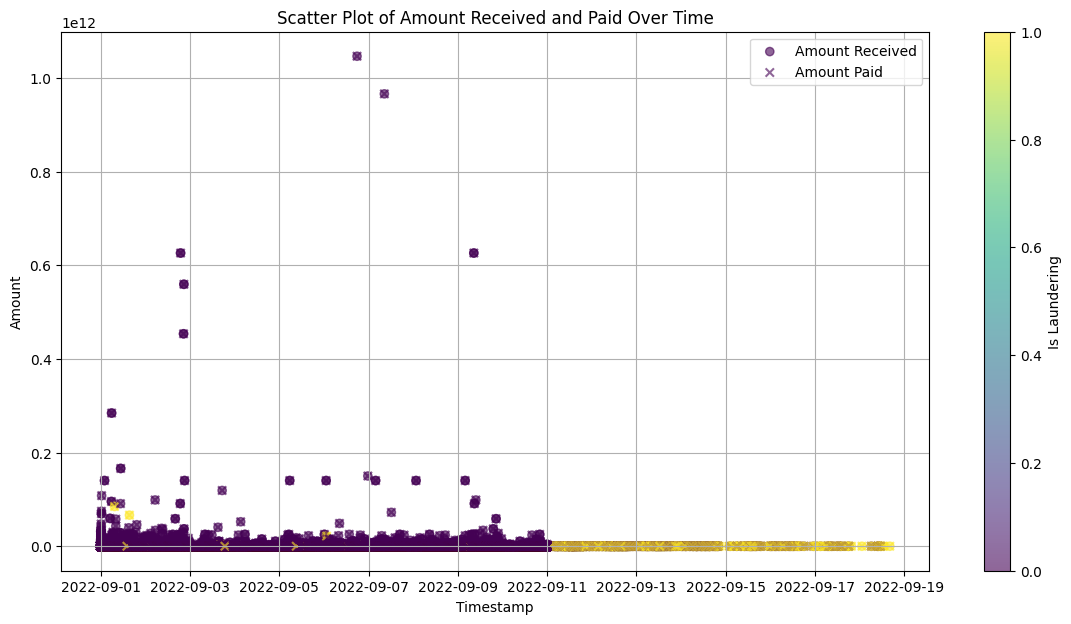

In [33]:
# Convert the Timestamp column to datetime format
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'], format='%Y/%m/%d %H:%M')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a scatter plot
plt.scatter(hi_df['Timestamp'], hi_df['Amount_Received'], c=hi_df['Is_Laundering'], cmap='viridis', alpha=0.6, label='Amount Received')
plt.scatter(hi_df['Timestamp'], hi_df['Amount_Paid'], c=hi_df['Is_Laundering'], cmap='viridis', alpha=0.6, marker='x', label='Amount Paid')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Received and Paid Over Time')
plt.colorbar(label='Is Laundering')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

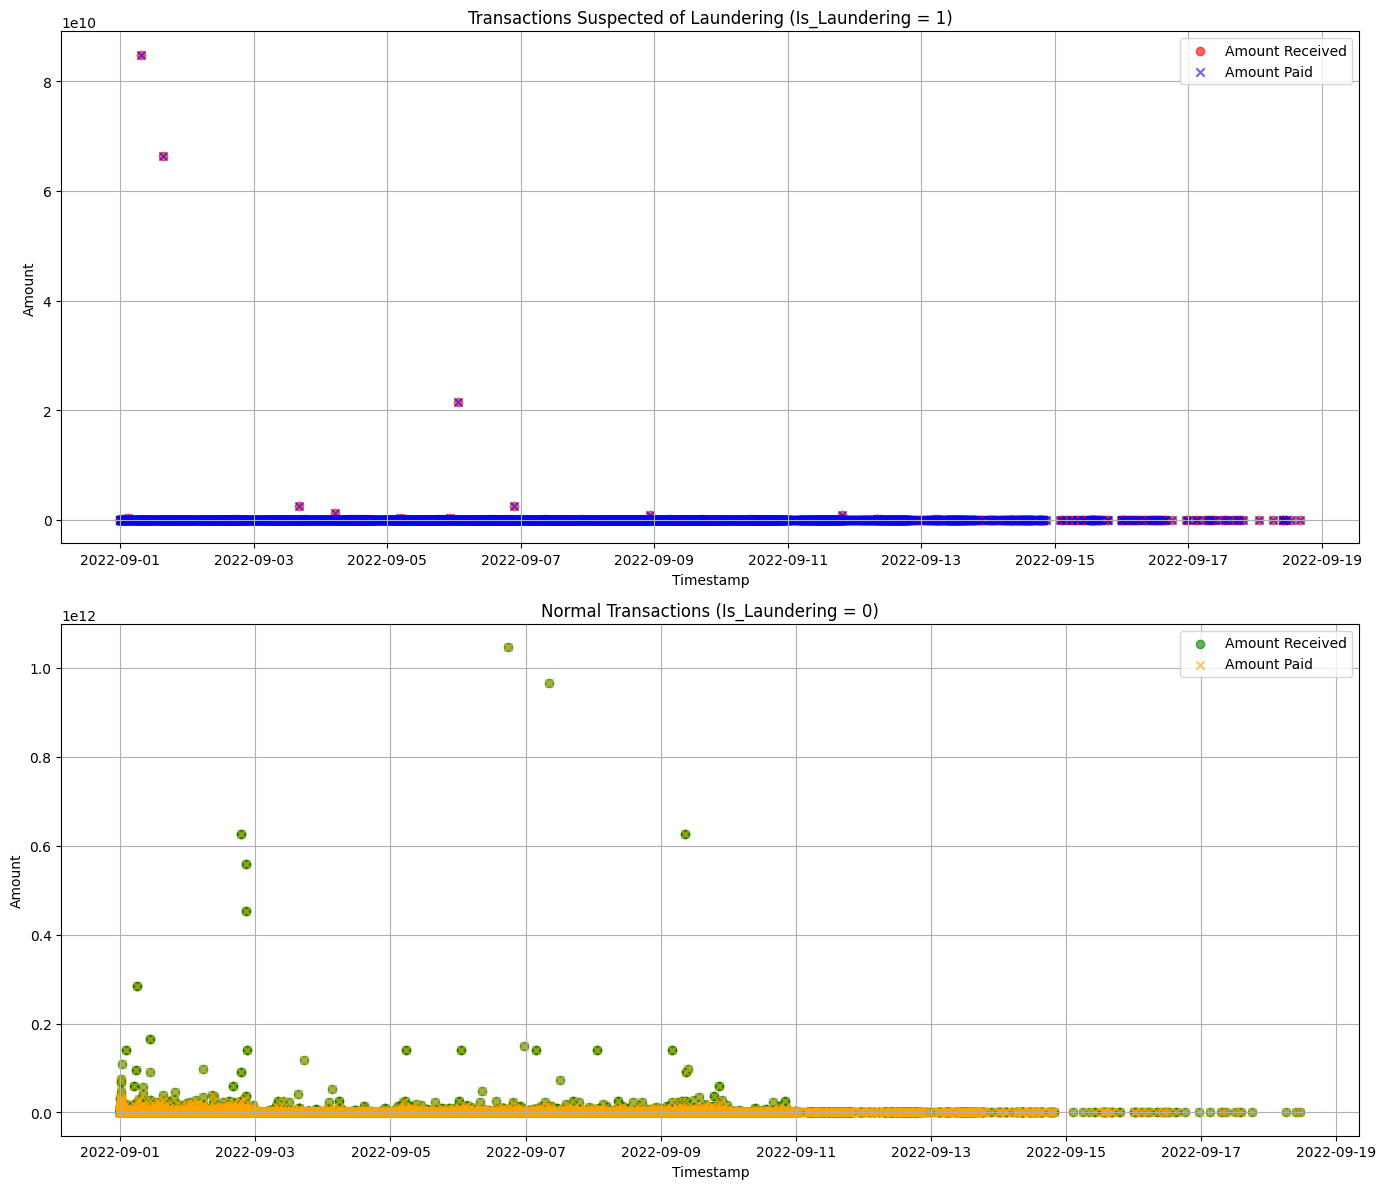

In [34]:
# Convert the Timestamp column to datetime format
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'], format='%Y/%m/%d %H:%M')

# Filter the DataFrame for Is_Laundering = 1 and Is_Laundering = 0
laundering_df = hi_df[hi_df['Is_Laundering'] == 1]
non_laundering_df = hi_df[hi_df['Is_Laundering'] == 0]

# Set up the subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot for Is_Laundering = 1
axes[0].scatter(laundering_df['Timestamp'], laundering_df['Amount_Received'], color='red', alpha=0.6, label='Amount Received')
axes[0].scatter(laundering_df['Timestamp'], laundering_df['Amount_Paid'], color='blue', alpha=0.6, marker='x', label='Amount Paid')
axes[0].set_title('Transactions Suspected of Laundering (Is_Laundering = 1)')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Amount')
axes[0].legend()
axes[0].grid(True)

# Plot for Is_Laundering = 0
axes[1].scatter(non_laundering_df['Timestamp'], non_laundering_df['Amount_Received'], color='green', alpha=0.6, label='Amount Received')
axes[1].scatter(non_laundering_df['Timestamp'], non_laundering_df['Amount_Paid'], color='orange', alpha=0.6, marker='x', label='Amount Paid')
axes[1].set_title('Normal Transactions (Is_Laundering = 0)')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Amount')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

LI

In [47]:
li_df = pd.read_csv(r"C:\Users\agbol\Downloads\AML_Data\LI-Small_Trans.csv")
li_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [48]:
new_column_names = {
    'Timestamp': 'Timestamp',
    'From Bank': 'From_Bank',
    'Account': 'From_Account',
    'To Bank': 'To_Bank',
    'Account.1': 'To_Account',
    'Amount Received': 'Amount_Received',
    'Receiving Currency': 'Receiving_Currency',
    'Amount Paid': 'Amount_Paid',
    'Payment Currency': 'Payment_Currency',
    'Payment Format': 'Payment_Format',
    'Is Laundering': 'Is_Laundering'
}

# Rename the columns
li_df = li_df.rename(columns=new_column_names)

li_df.head()

,Timestamp,From_Bank,From_Account,To_Bank,To_Account,Amount_Received,Receiving_Currency,Amount_Paid,Payment_Currency,Payment_Format,Is_Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [4]:
# Convert necessary columns to categorical data type
li_df['Is_Laundering'] = li_df['Is_Laundering'].astype('category')
li_df['From_Bank'] = li_df['From_Bank'].astype('category')
li_df['To_Bank'] = li_df['To_Bank'].astype('category')
li_df['Receiving_Currency'] = li_df['Receiving_Currency'].astype('category')
li_df['Payment_Currency'] = li_df['Payment_Currency'].astype('category')
li_df['Payment_Format'] = li_df['Payment_Format'].astype('category')

print(li_df.dtypes)


NameError: name 'li_df' is not defined

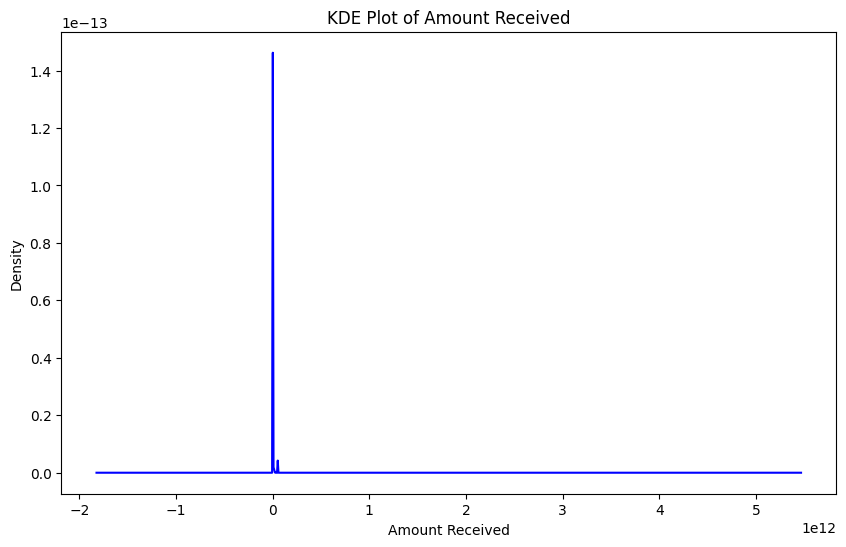

In [26]:
# Plot KDE for 'Amount Received'
plt.figure(figsize=(10, 6))
li_df['Amount_Received'].plot(kind='kde', color='blue')
plt.title('KDE Plot of Amount Received')
plt.xlabel('Amount Received')
plt.show()

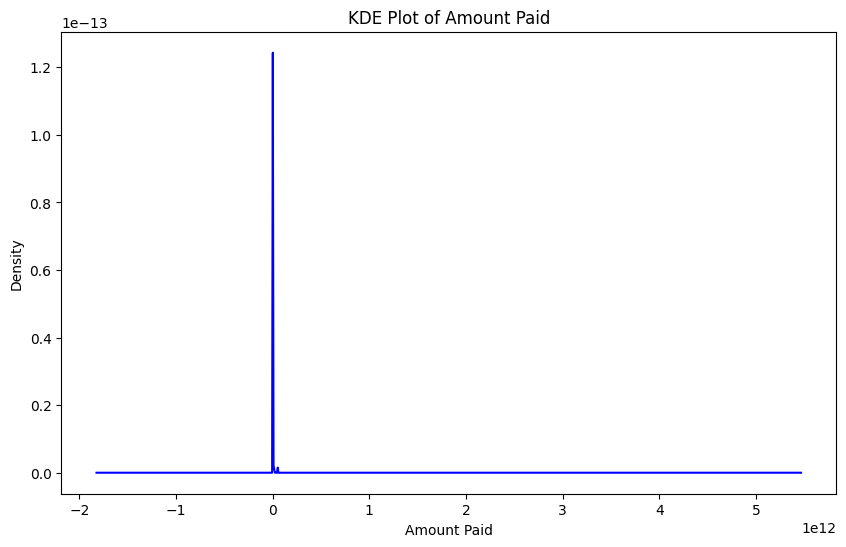

In [27]:
# Plot KDE for 'Amount Received'
plt.figure(figsize=(10, 6))
li_df['Amount_Paid'].plot(kind='kde', color='blue')
plt.title('KDE Plot of Amount Paid')
plt.xlabel('Amount Paid')
plt.show()

In [29]:
# Convert the Timestamp column to datetime format
li_df['Timestamp'] = pd.to_datetime(li_df['Timestamp'], format='%Y/%m/%d %H:%M')

# Find the minimum and maximum timestamps
min_timestamp = li_df['Timestamp'].min()
max_timestamp = li_df['Timestamp'].max()

print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)

Minimum Timestamp: 2022-09-01 00:00:00
Maximum Timestamp: 2022-09-17 15:28:00


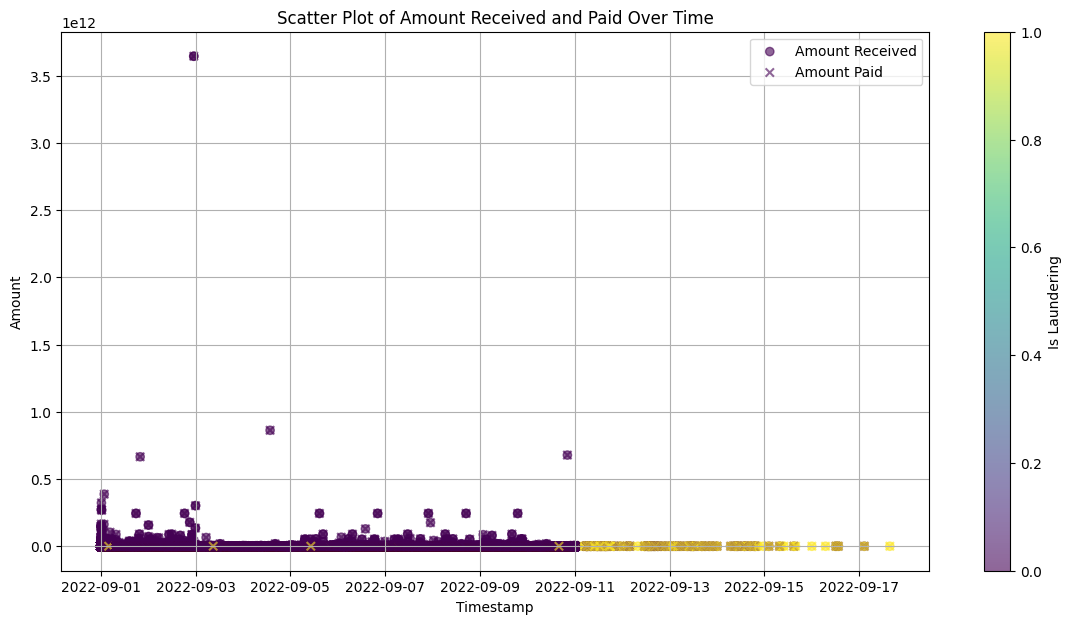

In [31]:
# Convert the Timestamp column to datetime format
li_df['Timestamp'] = pd.to_datetime(li_df['Timestamp'], format='%Y/%m/%d %H:%M')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a scatter plot
plt.scatter(li_df['Timestamp'], li_df['Amount_Received'], c=li_df['Is_Laundering'], cmap='viridis', alpha=0.6, label='Amount Received')
plt.scatter(li_df['Timestamp'], li_df['Amount_Paid'], c=li_df['Is_Laundering'], cmap='viridis', alpha=0.6, marker='x', label='Amount Paid')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Received and Paid Over Time')
plt.colorbar(label='Is Laundering')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

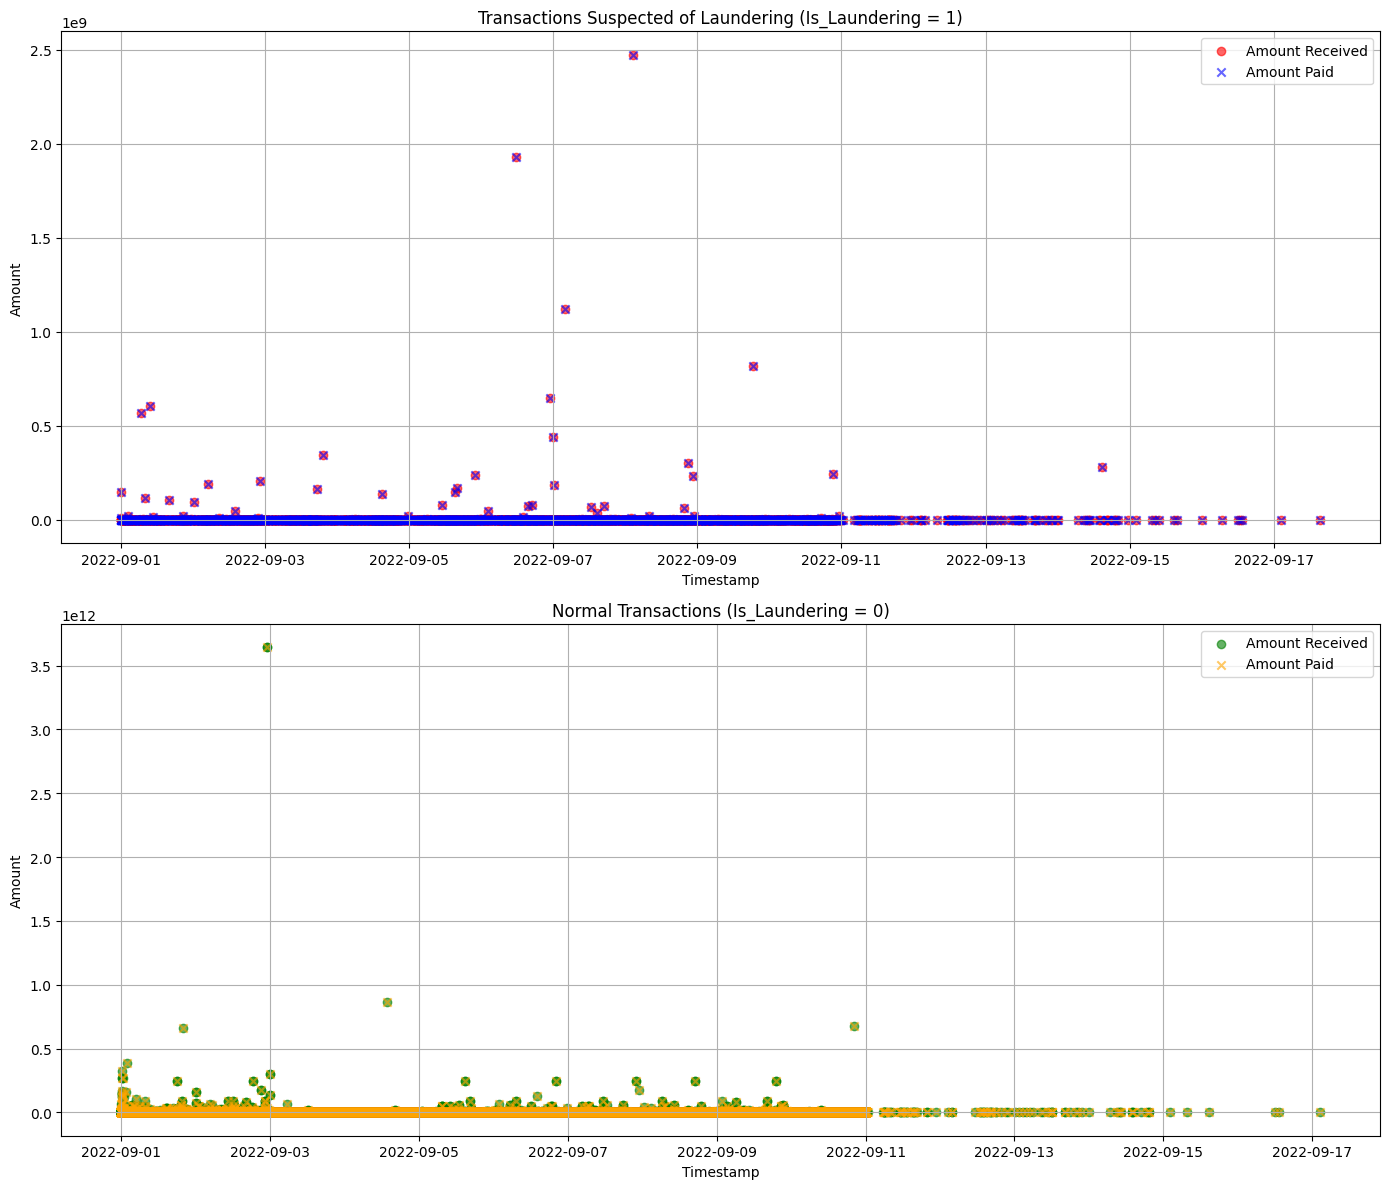

In [32]:
# Convert the Timestamp column to datetime format
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'], format='%Y/%m/%d %H:%M')

# Filter the DataFrame for Is_Laundering = 1 and Is_Laundering = 0
laundering_df = li_df[li_df['Is_Laundering'] == 1]
non_laundering_df = li_df[li_df['Is_Laundering'] == 0]

# Set up the subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot for Is_Laundering = 1
axes[0].scatter(laundering_df['Timestamp'], laundering_df['Amount_Received'], color='red', alpha=0.6, label='Amount Received')
axes[0].scatter(laundering_df['Timestamp'], laundering_df['Amount_Paid'], color='blue', alpha=0.6, marker='x', label='Amount Paid')
axes[0].set_title('Transactions Suspected of Laundering (Is_Laundering = 1)')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Amount')
axes[0].legend()
axes[0].grid(True)

# Plot for Is_Laundering = 0
axes[1].scatter(non_laundering_df['Timestamp'], non_laundering_df['Amount_Received'], color='green', alpha=0.6, label='Amount Received')
axes[1].scatter(non_laundering_df['Timestamp'], non_laundering_df['Amount_Paid'], color='orange', alpha=0.6, marker='x', label='Amount Paid')
axes[1].set_title('Normal Transactions (Is_Laundering = 0)')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Amount')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

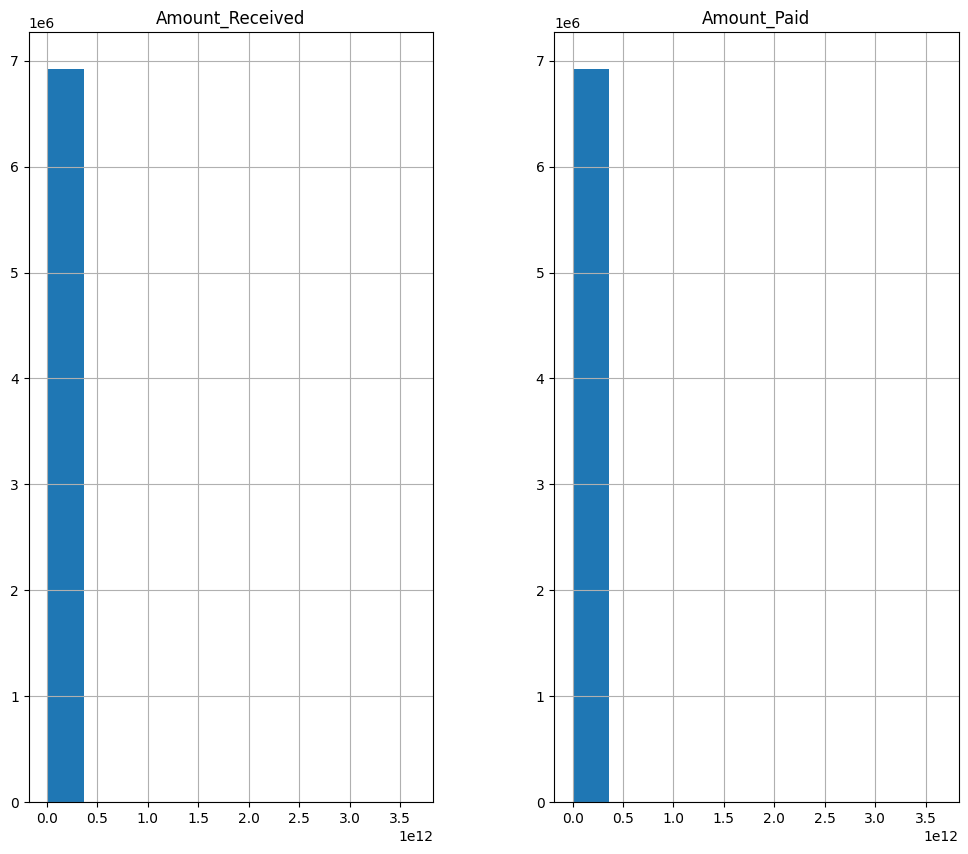

In [50]:
# Plot histograms for numerical columns to understand their distributions
li_df.hist(figsize=(12, 10))
plt.show()

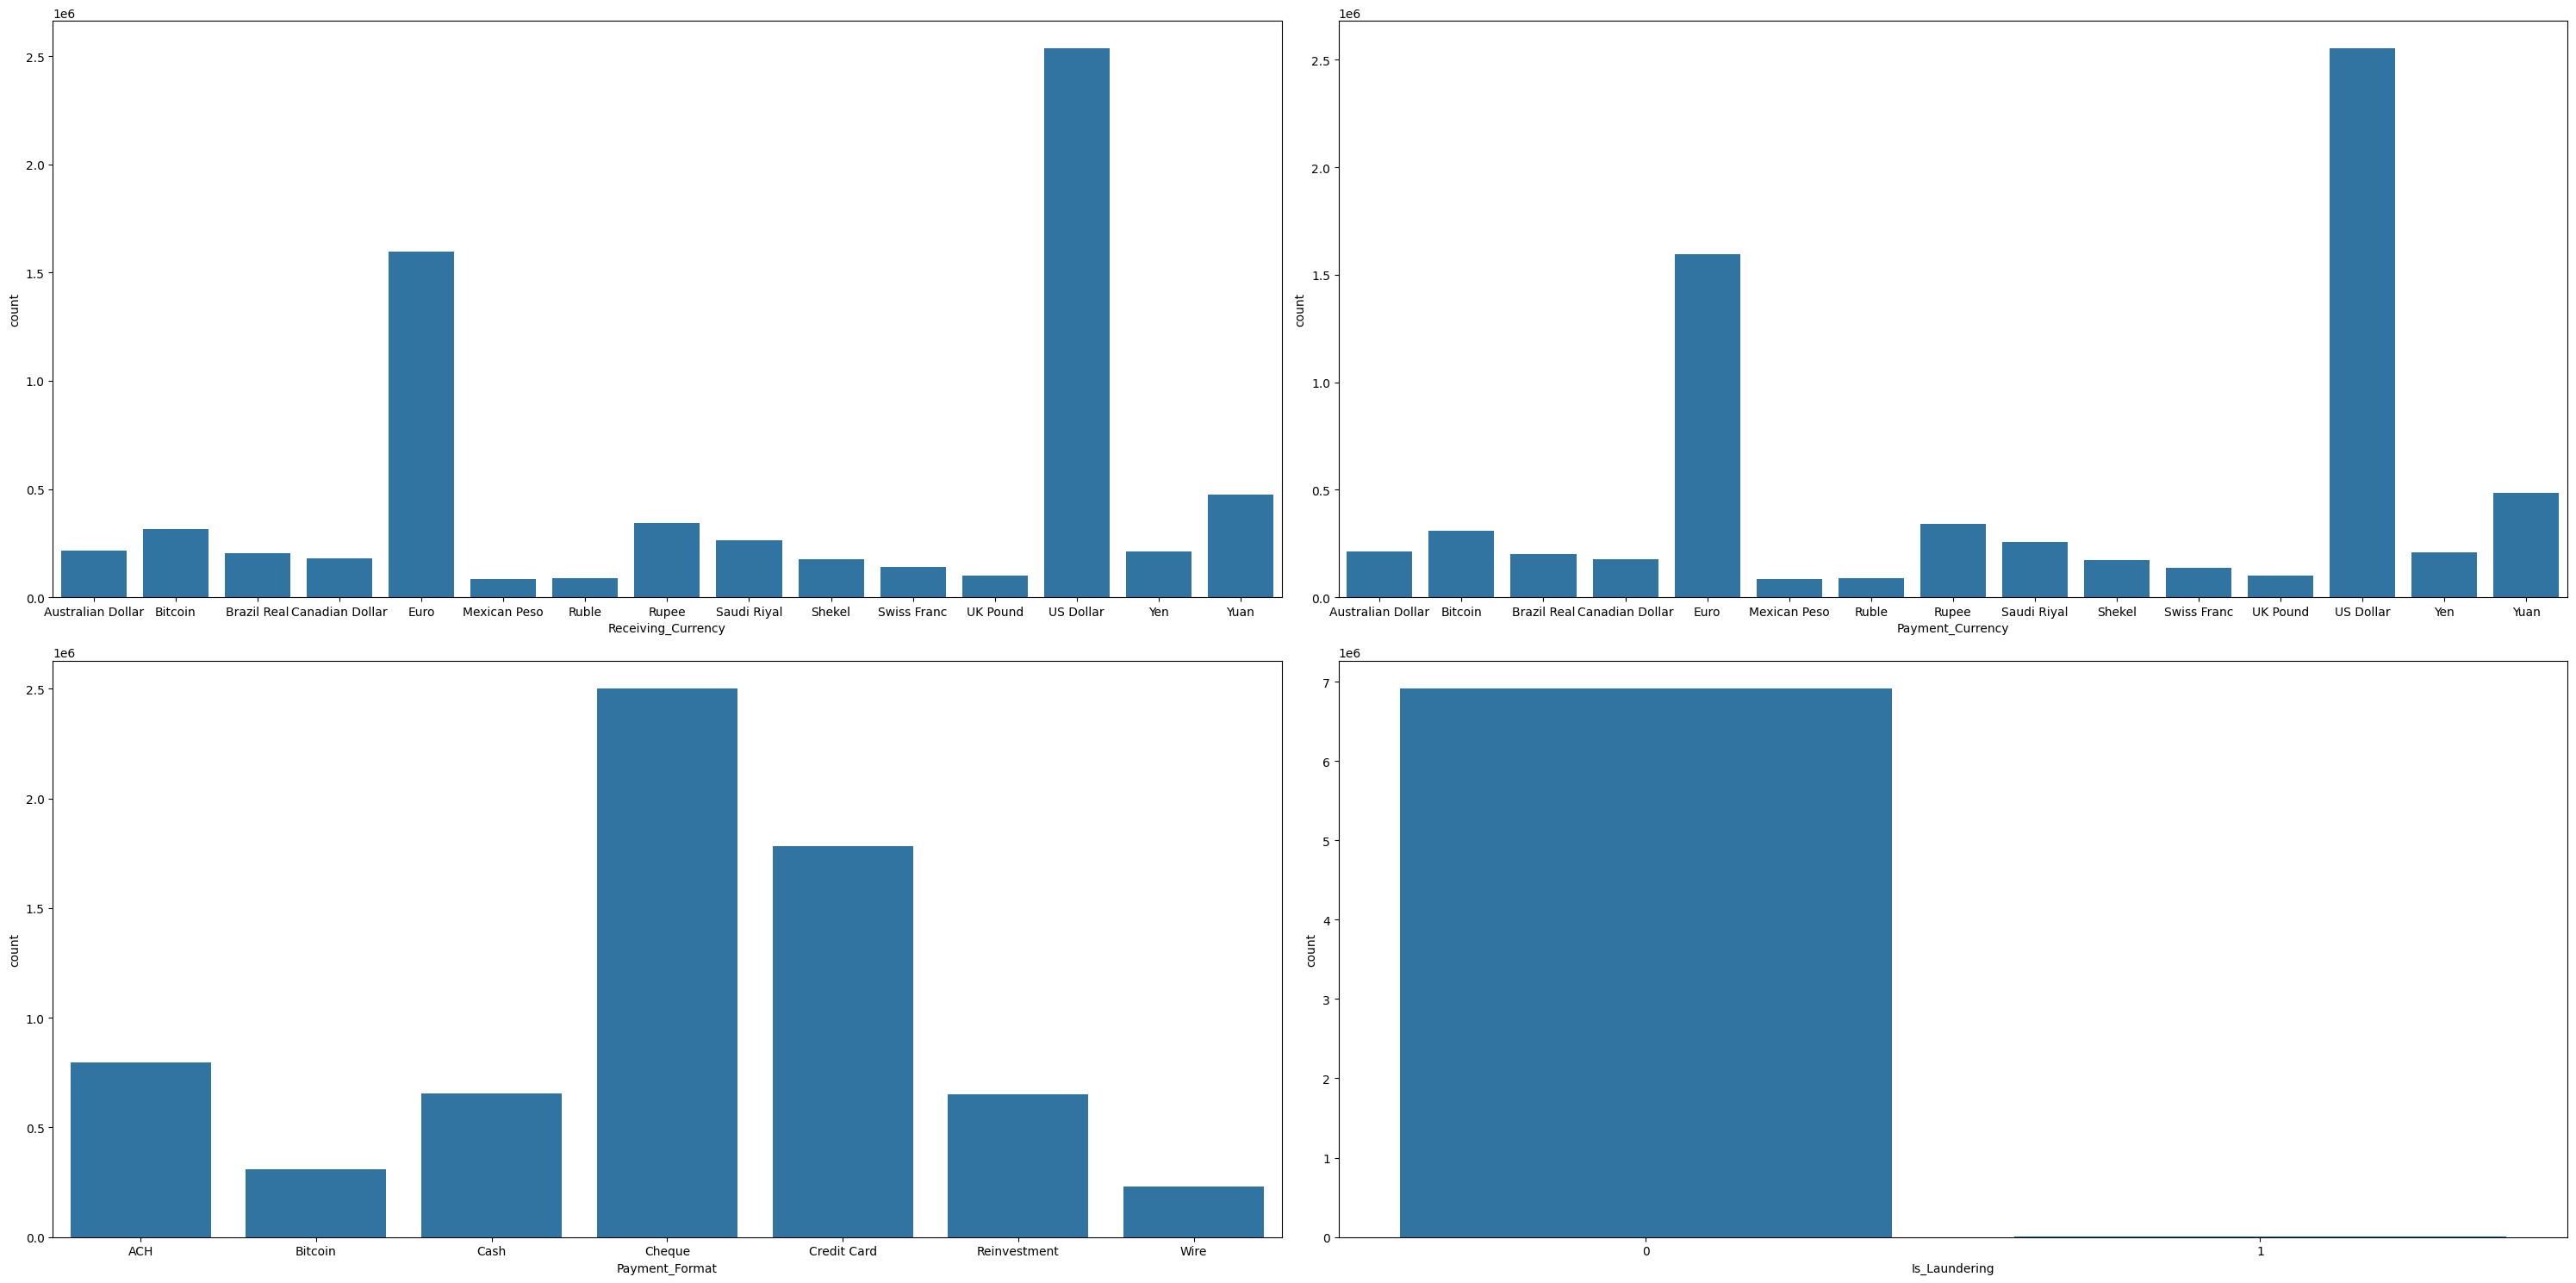

In [51]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

# Plot bar charts for the specified categorical columns
sns.countplot(x='Receiving_Currency', data=li_df, ax=axes[0, 0])
sns.countplot(x='Payment_Currency', data=li_df, ax=axes[0, 1])
sns.countplot(x='Payment_Format', data=li_df, ax=axes[1, 0])
sns.countplot(x='Is_Laundering', data=li_df, ax=axes[1, 1])



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Linear Regression Model

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [5]:
# Assuming the data is loaded into a DataFrame df
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train

,From_Bank,To_Bank,Amount_Received,Amount_Paid,Hour,DayOfWeek,Month,From_Account,To_Account,Receiving_Currency,Payment_Currency,Payment_Format
4445192,22345,1686,8890361.34,8890361.34,8,4,9,8051D2AA0,8066895F0,US Dollar,US Dollar,Cheque
4796316,12,12797,273.52,273.52,21,4,9,8007FB340,80497C120,Euro,Euro,ACH
4266505,211,26,736.72,736.72,1,4,9,8076E7740,80883F240,UK Pound,UK Pound,Cheque
3048655,19535,12979,76023.99,76023.99,13,1,9,807F81840,80EA85570,US Dollar,US Dollar,Cheque
3544733,16927,117070,1982263.76,1982263.76,14,2,9,806481E90,8064A9D40,Ruble,Ruble,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
1570006,70,17769,4155.40,4155.40,14,4,9,1004286A8,80A0D4A20,Euro,Euro,Cheque
2234489,3514,23525,10418.57,10418.57,17,6,9,801B5BF90,801DD08A0,Euro,Euro,Cash
4926484,26442,4523,1514.82,1514.82,5,5,9,809FA3370,809FA7020,US Dollar,US Dollar,ACH
4304572,12004,49871,49.61,49.61,2,4,9,800D83CD0,8126D33F0,Euro,Euro,Credit Card


In [7]:
X_test

,From_Bank,To_Bank,Amount_Received,Amount_Paid,Hour,DayOfWeek,Month,From_Account,To_Account,Receiving_Currency,Payment_Currency,Payment_Format
298872,117,40653,4981.60,4981.60,0,3,9,80E50C3C0,80FA8F490,Swiss Franc,Swiss Franc,Cheque
746726,10,22828,297.72,297.72,13,3,9,8001C6CC0,8010A7DF0,US Dollar,US Dollar,Cheque
405190,29191,29191,32.90,32.90,2,3,9,80CAF3CE0,80CAF3CE0,Yuan,Yuan,Reinvestment
1388703,10,14381,194634.45,194634.45,8,4,9,804DC2C20,80597A020,Rupee,Rupee,Cheque
4713645,16136,16031,698940.91,698940.91,18,4,9,80A5EC8A0,80C038E30,US Dollar,US Dollar,ACH
...,...,...,...,...,...,...,...,...,...,...,...,...
5048978,7,217496,297082.33,297082.33,20,5,9,806152370,8065B7BB0,Ruble,Ruble,Credit Card
3386853,5466,5464,2.90,2.90,6,2,9,807AB6340,80C29A6A0,Euro,Euro,Cash
3757348,21174,513,57.21,57.21,0,3,9,800B81400,8010E1B50,US Dollar,US Dollar,Cheque
344880,22828,13037,2146.72,2146.72,1,3,9,801188200,801339E50,US Dollar,US Dollar,Cheque


In [9]:
# Define the column transformer
numeric_features = ['Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month']
categorical_features = [ 'From_Bank', 'To_Bank','From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])


In [10]:
pipeline.fit(X_train, y_train)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount_Received',
                                                   'Amount_Paid', 'Hour',
                                                   'DayOfWeek', 'Month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['From_Bank', 'To_Bank',
                                                   'From_Account', 'To_Account',
                                                   'Receiving_Currency',
                                                   'Payment_Currency',
                                                   'Payment_Format'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [11]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.70      0.09      0.16      1087

    accuracy                           1.00   1015669
   macro avg       0.85      0.55      0.58   1015669
weighted avg       1.00      1.00      1.00   1015669



class weights

In [14]:
# Define the pipeline with class weights
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.44      0.22      1087

    accuracy                           1.00   1015669
   macro avg       0.57      0.72      0.61   1015669
weighted avg       1.00      1.00      1.00   1015669



SMOTE

In [21]:
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the pipeline with SMOTE and Logistic Regression with balanced class weights
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Logistic Regression with SMOTE and Balanced Class Weights Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Logistic Regression with SMOTE and Balanced Class Weights Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.43      0.23      1087

    accuracy                           1.00   1015669
   macro avg       0.58      0.72      0.61   1015669
weighted avg       1.00      1.00      1.00   1015669



class weights & smote

In [24]:
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the pipeline with SMOTE and Logistic Regression with balanced class weights
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Logistic Regression with SMOTE and Balanced Class Weights Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Logistic Regression with SMOTE and Balanced Class Weights Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.43      0.23      1087

    accuracy                           1.00   1015669
   macro avg       0.58      0.72      0.61   1015669
weighted avg       1.00      1.00      1.00   1015669



under sampler & class weights & smote

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the pipeline with Random Undersampler, SMOTE, class weights, and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1014582
           1       0.01      0.95      0.01      1087

    accuracy                           0.82   1015669
   macro avg       0.50      0.89      0.46   1015669
weighted avg       1.00      0.82      0.90   1015669



In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the pipeline with Random Undersampler, SMOTE, class weights, and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1014582
           1       0.01      0.95      0.01      1087

    accuracy                           0.82   1015669
   macro avg       0.50      0.89      0.46   1015669
weighted avg       1.00      0.82      0.90   1015669



In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the pipeline with Random Undersampler, SMOTE, class weights, and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Logistic Regression with Random Undersampler, SMOTE, and Balanced Class Weights Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1014582
           1       0.01      0.95      0.01      1087

    accuracy                           0.82   1015669
   macro avg       0.50      0.89      0.46   1015669
weighted avg       1.00      0.82      0.90   1015669



Feature Importance

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\2134058512.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

Mean Squared Error: 0.0010649997163236832
R^2 Score: 0.003821442635493444


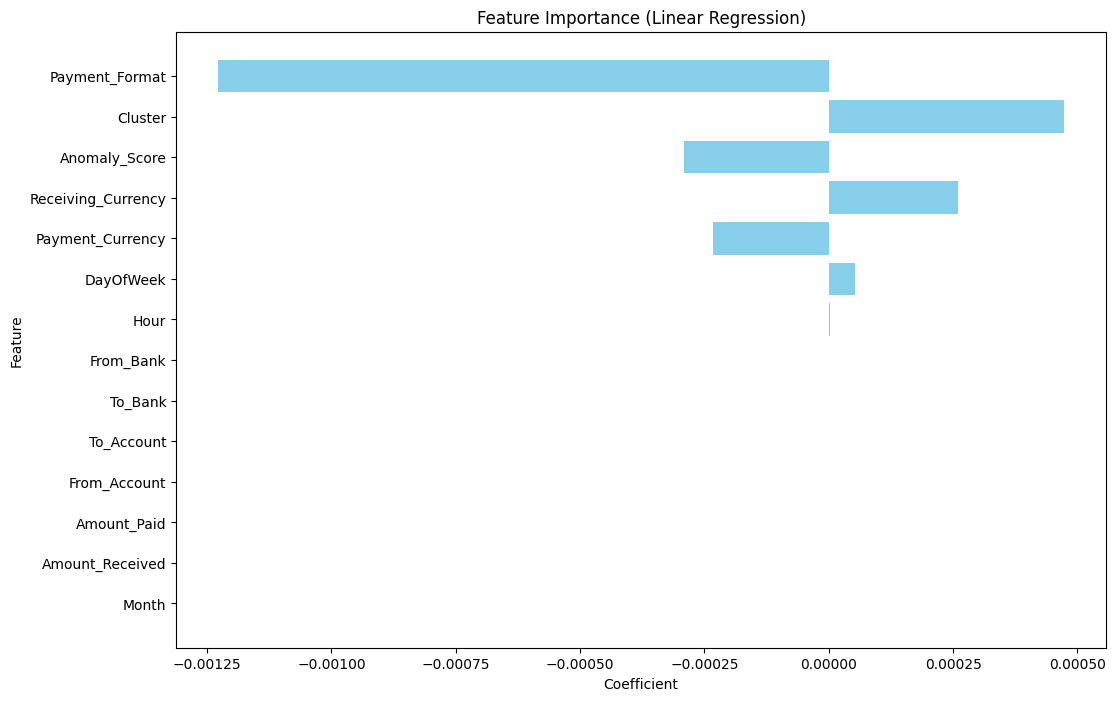

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure Timestamp is in datetime format
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns, including Anomaly_Score and Cluster
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format',
                   'Anomaly_Score', 'Cluster']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

# Print the regression metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Get feature importances (coefficients)
coefficients = linear_regression.coef_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load data into a DataFrame
# Assuming hi_df is already loaded

# Convert timestamp to datetime
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extract time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the column transformer
numeric_features = ['Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month']
categorical_features = ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Fit the pipeline on the SMOTE training data
pipeline.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\1605479988.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

hyperparameter tunning

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Assuming hi_df is your dataframe
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



# Define the column transformer
numeric_features = ['Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month']
categorical_features = ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Define the hyperparameters grid
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': ['balanced']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Predict on the test set
y_pred = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.17      0.41      0.24      1087

    accuracy                           1.00   1015669
   macro avg       0.58      0.71      0.62   1015669
weighted avg       1.00      1.00      1.00   1015669

Best parameters found:  {'classifier__penalty': 'l2', 'classifier__class_weight': 'balanced', 'classifier__C': 10}


Hyperparameter with smote

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming hi_df is your dataframe
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
numeric_features = ['Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month']
categorical_features = ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define the pipeline
pipeline = Pipeline(steps=[('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Define the hyperparameters grid
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': ['balanced']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.16      0.37      0.22      1087

    accuracy                           1.00   1015669
   macro avg       0.58      0.69      0.61   1015669
weighted avg       1.00      1.00      1.00   1015669

Best parameters found:  {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}


Decision Trees

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report



In [29]:
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\4034475670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

In [1]:
# Define and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



KeyboardInterrupt



In [32]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.29      0.25      0.27      1087

    accuracy                           1.00   1015669
   macro avg       0.65      0.63      0.64   1015669
weighted avg       1.00      1.00      1.00   1015669



smote

In [33]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
   # ('sampling', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),  # Adjust sampling_strategy as needed
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.33      0.20      1087

    accuracy                           1.00   1015669
   macro avg       0.57      0.67      0.60   1015669
weighted avg       1.00      1.00      1.00   1015669



smoothe & undersampler

In [34]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
   ('sampling', RandomUnderSampler(random_state=42)),  # Adjust sampling_strategy as needed
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.88      0.93   1014582
           1       0.01      0.87      0.02      1087

    accuracy                           0.88   1015669
   macro avg       0.50      0.87      0.47   1015669
weighted avg       1.00      0.88      0.93   1015669



hyperparmeter

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Assuming hi_df is your dataframe
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Use a smaller subset of data for parameter tuning (50,000 samples)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)


# Define the column transformer
numeric_features = ['Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month']
categorical_features = ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

# Define the hyperparameters grid for Decision Tree
param_grid = {
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': ['balanced']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Predict on the test set
y_pred = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    101463
           1       0.01      0.57      0.02       104

    accuracy                           0.95    101567
   macro avg       0.51      0.76      0.50    101567
weighted avg       1.00      0.95      0.97    101567

Best parameters found:  {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 20, 'classifier__class_weight': 'balanced'}


Gradient Boosting Machines (GBM)

In [127]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 2.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
hi_df

,Timestamp,From_Bank,From_Account,To_Bank,To_Account,Amount_Received,Receiving_Currency,Amount_Paid,Payment_Currency,Payment_Format,Is_Laundering,Hour,DayOfWeek,Month
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0,0,3,9
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0,0,3,9
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0,0,3,9
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0,0,3,9
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0,0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0,23,5,9
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0,23,5,9
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0,23,5,9
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0,23,5,9


In [35]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
# df = pd.read_csv('your_dataset.csv') # Assuming the data is loaded into a DataFrame df


In [36]:
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\4034475670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

In [131]:
# Define and train the Gradient Boosting Machine (LightGBM) Classifier
gbm_classifier = lgb.LGBMClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

[LightGBM] [Info] Number of positive: 4090, number of negative: 4058586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.589845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 4062676, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001007 -> initscore=-6.900045
[LightGBM] [Info] Start training from score -6.900045


LGBMClassifier(random_state=42)

In [132]:
# Predict on the test set
y_pred = gbm_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.47      0.20      0.28      1087

    accuracy                           1.00   1015669
   macro avg       0.73      0.60      0.64   1015669
weighted avg       1.00      1.00      1.00   1015669



smoothe

In [37]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.33      0.20      1087

    accuracy                           1.00   1015669
   macro avg       0.57      0.67      0.60   1015669
weighted avg       1.00      1.00      1.00   1015669



In [38]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.15      0.33      0.20      1087

    accuracy                           1.00   1015669
   macro avg       0.57      0.67      0.60   1015669
weighted avg       1.00      1.00      1.00   1015669



In [39]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
    ('sampling', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),  # Adjust sampling_strategy as needed
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1014582
           1       0.01      0.81      0.02      1087

    accuracy                           0.89   1015669
   macro avg       0.50      0.85      0.48   1015669
weighted avg       1.00      0.89      0.94   1015669



In [41]:
# Define the preprocessing steps with RUS, SMOTE, and class weight
preprocessor = ImbPipeline(steps=[
    ('sampling', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),  # Adjust sampling_strategy as needed
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Fit the pipeline
preprocessor.fit(X_train, y_train)

# Predict on the test set
y_pred = preprocessor.predict(X_test)

# Print the classification report
print("Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Decision Tree Classifier with RUS, SMOTE, and Class Weighting Classification Report:


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1014582
           1       0.01      0.79      0.02      1087

    accuracy                           0.91   1015669
   macro avg       0.50      0.85      0.48   1015669
weighted avg       1.00      0.91      0.95   1015669



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import lightgbm as lgb

# Ensure Timestamp is in datetime format
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns, including Anomaly_Score and Cluster
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format',
                   'Anomaly_Score', 'Cluster']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Gradient Boosting Machine (LightGBM) Classifier
gbm_classifier = lgb.LGBMClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\4184516847.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

[LightGBM] [Info] Number of positive: 4090, number of negative: 4058586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set: 4062676, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001007 -> initscore=-6.900045
[LightGBM] [Info] Start training from score -6.900045


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1014582
           1       0.49      0.20      0.28      1087

    accuracy                           1.00   1015669
   macro avg       0.74      0.60      0.64   1015669
weighted avg       1.00      1.00      1.00   1015669



hyperparameter

In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Convert 'Timestamp' to datetime
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]
y = hi_df['Is_Laundering']

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Use a smaller subset of data for parameter tuning (50,000 samples)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)



# Define the Gradient Boosting Machine (LightGBM) Classifier
gbm_classifier = lgb.LGBMClassifier(random_state=42)

# Define the hyperparameters grid for LightGBM
param_grid_gbm = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'class_weight': ['balanced']
}

# Perform Grid Search with Cross-Validation
grid_search_gbm = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid_gbm, cv=3, n_jobs=-1, scoring='f1')
grid_search_gbm.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search_gbm.best_params_
best_gbm_classifier = grid_search_gbm.best_estimator_

# Predict on the test set
y_pred = best_gbm_classifier.predict(X_test)

# Print the classification report
print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_744\678575639.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: 

[LightGBM] [Info] Number of positive: 414, number of negative: 405853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 406267, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 50}


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101463
           1       0.09      0.28      0.14       104

    accuracy                           1.00    101567
   macro avg       0.55      0.64      0.57    101567
weighted avg       1.00      1.00      1.00    101567



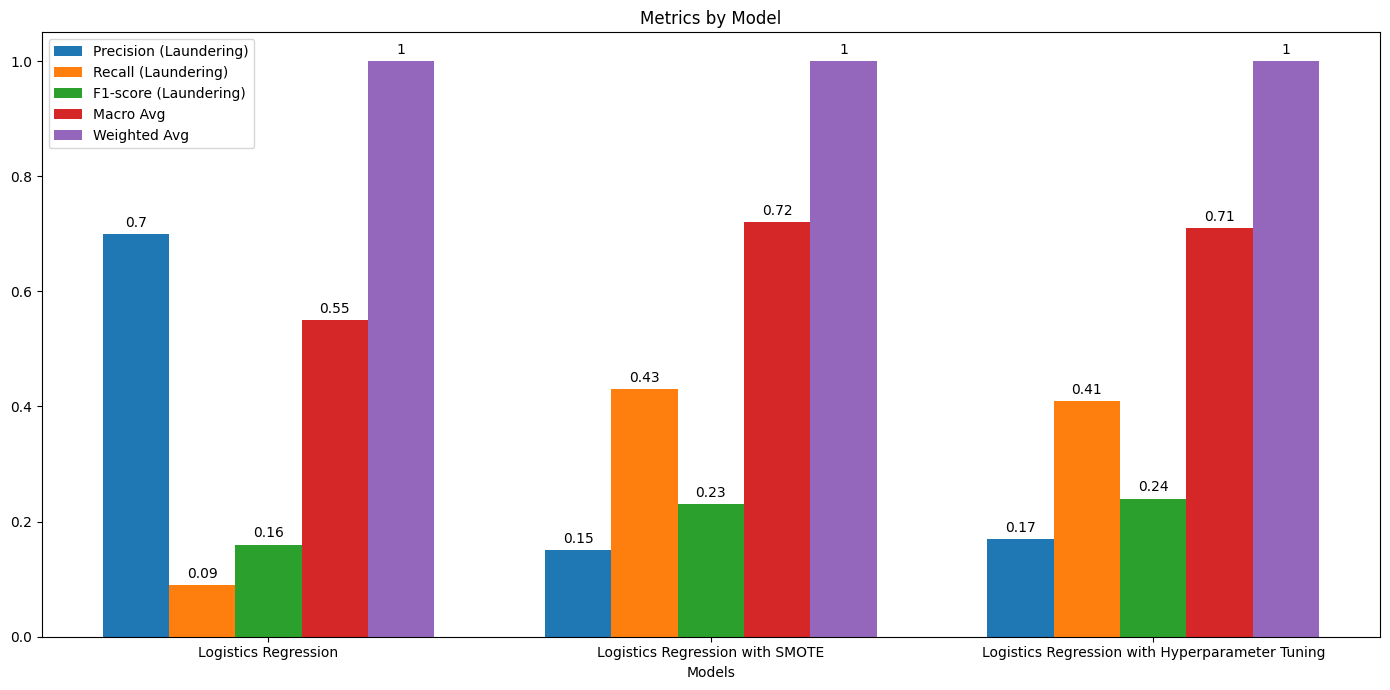

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
labels = ['Logistics Regression', 'Logistics Regression with SMOTE', 'Logistics Regression with Hyperparameter Tuning']

precision = [0.70, 0.15, 0.17]
recall = [0.09, 0.43, 0.41]
f1_score = [0.16, 0.23, 0.24]
macro_avg = [0.55, 0.72, 0.71]
weighted_avg = [1, 1, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - 2*width, precision, width, label='Precision (Laundering)')
rects2 = ax.bar(x - width, recall, width, label='Recall (Laundering)')
rects3 = ax.bar(x, f1_score, width, label='F1-score (Laundering)')
rects4 = ax.bar(x + width, macro_avg, width, label='Macro Avg')
rects5 = ax.bar(x + 2*width, weighted_avg, width, label='Weighted Avg')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()


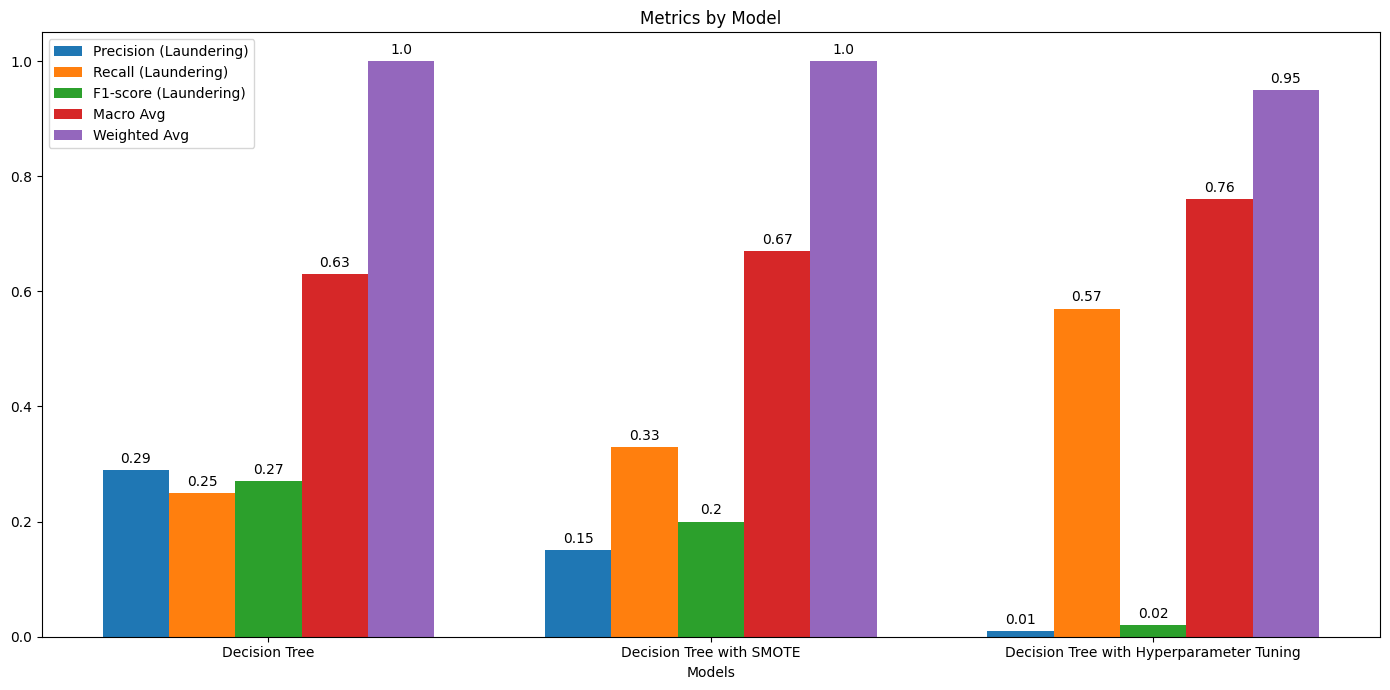

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
labels = [
    'Decision Tree', 
    'Decision Tree with SMOTE', 
    'Decision Tree with Hyperparameter Tuning'
]

precision = [0.29, 0.15, 0.01]
recall = [0.25, 0.33, 0.57]
f1_score = [0.27, 0.20, 0.02]
macro_avg = [0.63, 0.67, 0.76]
weighted_avg = [1, 1, 0.95]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - 2*width, precision, width, label='Precision (Laundering)')
rects2 = ax.bar(x - width, recall, width, label='Recall (Laundering)')
rects3 = ax.bar(x, f1_score, width, label='F1-score (Laundering)')
rects4 = ax.bar(x + width, macro_avg, width, label='Macro Avg')
rects5 = ax.bar(x + 2*width, weighted_avg, width, label='Weighted Avg')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()


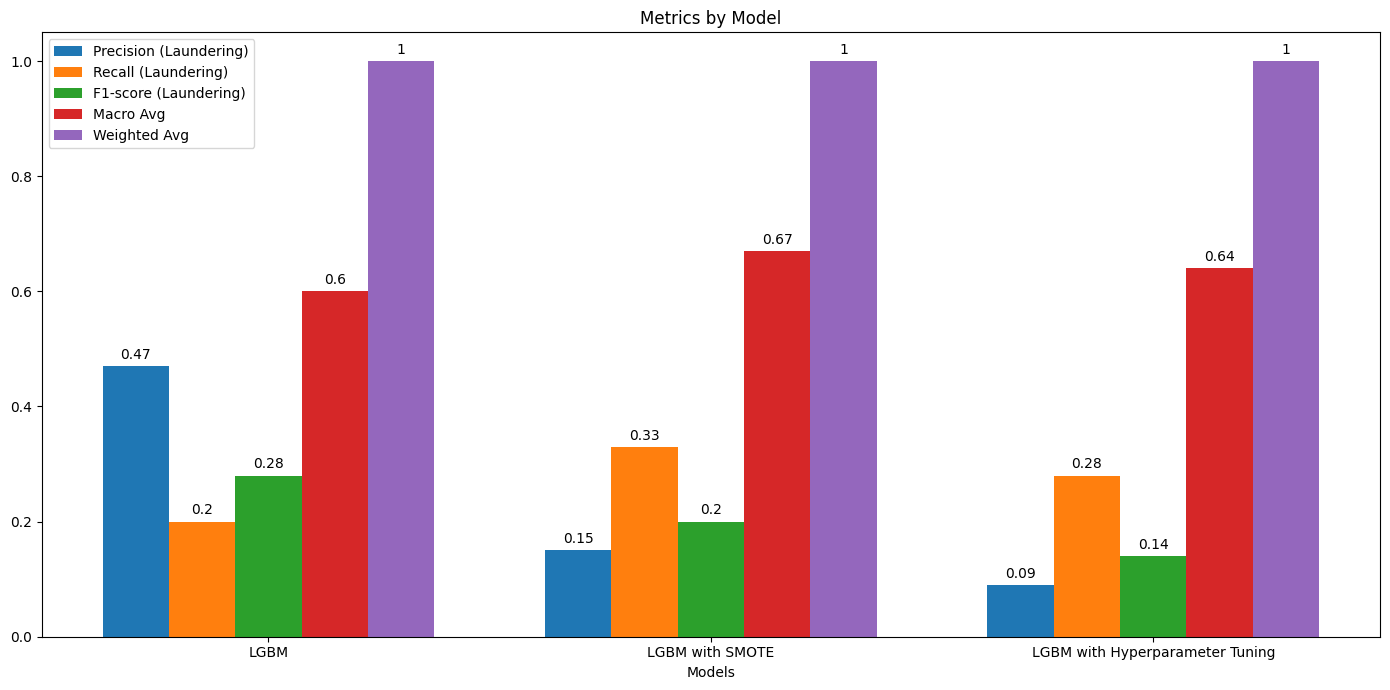

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
labels = [
    'LGBM', 
    'LGBM with SMOTE', 
    'LGBM with Hyperparameter Tuning'
]

precision = [0.47, 0.15, 0.09]
recall = [0.20, 0.33, 0.28]
f1_score = [0.28, 0.20, 0.14]
macro_avg = [0.60, 0.67, 0.64]
weighted_avg = [1, 1, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - 2*width, precision, width, label='Precision (Laundering)')
rects2 = ax.bar(x - width, recall, width, label='Recall (Laundering)')
rects3 = ax.bar(x, f1_score, width, label='F1-score (Laundering)')
rects4 = ax.bar(x + width, macro_avg, width, label='Macro Avg')
rects5 = ax.bar(x + 2*width, weighted_avg, width, label='Weighted Avg')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()


In [54]:
hi_df

,Timestamp,From_Bank,From_Account,To_Bank,To_Account,Amount_Received,Receiving_Currency,Amount_Paid,Payment_Currency,Payment_Format,Is_Laundering,Hour,DayOfWeek,Month,Cluster,Anomaly_Score
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0,0,3,9,1,1
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0,0,3,9,1,1
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0,0,3,9,1,1
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0,0,3,9,1,1
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0,0,3,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0,23,5,9,0,1
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0,23,5,9,0,1
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0,23,5,9,0,1
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0,23,5,9,0,1


In [47]:
# Assuming your DataFrame is named hi_df
grouped_counts = hi_df.groupby(['Cluster', 'Is_Laundering']).size().reset_index(name='Count')

print(grouped_counts)

C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\3857565705.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = hi_df.groupby(['Cluster', 'Is_Laundering']).size().reset_index(name='Count')


   Cluster Is_Laundering    Count
0        0             0  2101675
1        0             1     2126
2        1             0  1816898
3        1             1     1950
4        2             0  1154589
5        2             1     1101
6        3             0        6
7        3             1        0


In [8]:
# Assuming your DataFrame is named hi_df
grouped_counts = hi_df.groupby(['Anomaly_Score', 'Is_Laundering']).size().reset_index(name='Count')

print(grouped_counts)

C:\Users\agbol\AppData\Local\Temp\ipykernel_19504\4030840727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = hi_df.groupby(['Anomaly_Score', 'Is_Laundering']).size().reset_index(name='Count')


   Anomaly_Score Is_Laundering    Count
0             -1             0   507102
1             -1             1      733
2              1             0  4566066
3              1             1     4444


C:\Users\agbol\AppData\Local\Temp\ipykernel_19504\3515695897.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].map(freq_encoding)
C:\Users\agbol\AppData\Local\Temp\ipykernel_19504\3515695897.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].map(freq_encoding)
C:\Users\agbol\AppData\Local\Temp\ipykernel_19504\3515695897.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

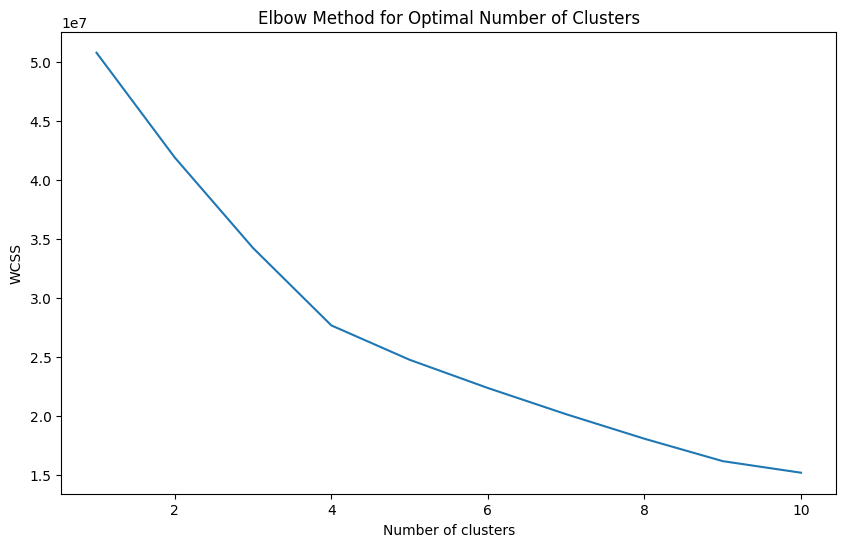

            Timestamp From_Bank From_Account To_Bank To_Account  \
0 2022-09-01 00:20:00        10    8000EBD30      10  8000EBD30   
1 2022-09-01 00:20:00      3208    8000F4580       1  8000F5340   
2 2022-09-01 00:00:00      3209    8000F4670    3209  8000F4670   
3 2022-09-01 00:02:00        12    8000F5030      12  8000F5030   
4 2022-09-01 00:06:00        10    8000F5200      10  8000F5200   

   Amount_Received Receiving_Currency  Amount_Paid Payment_Currency  \
0          3697.34          US Dollar      3697.34        US Dollar   
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.97          US Dollar     36682.97        US Dollar   

  Payment_Format Is_Laundering  Hour  DayOfWeek  Month  Cluster  
0   Reinvestment             0     0          3      9        2  
1         Cheque             0     0  

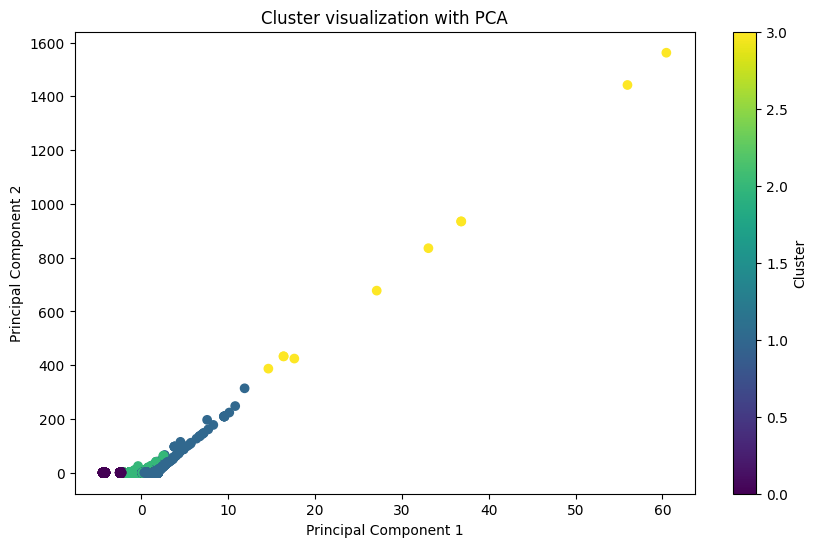

            Timestamp From_Bank From_Account To_Bank To_Account  \
0 2022-09-01 00:20:00        10    8000EBD30      10  8000EBD30   
1 2022-09-01 00:20:00      3208    8000F4580       1  8000F5340   
2 2022-09-01 00:00:00      3209    8000F4670    3209  8000F4670   
3 2022-09-01 00:02:00        12    8000F5030      12  8000F5030   
4 2022-09-01 00:06:00        10    8000F5200      10  8000F5200   

   Amount_Received Receiving_Currency  Amount_Paid Payment_Currency  \
0          3697.34          US Dollar      3697.34        US Dollar   
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.97          US Dollar     36682.97        US Dollar   

  Payment_Format Is_Laundering  Hour  DayOfWeek  Month  Cluster  Anomaly_Score  
0   Reinvestment             0     0          3      9        2             -1  
1       

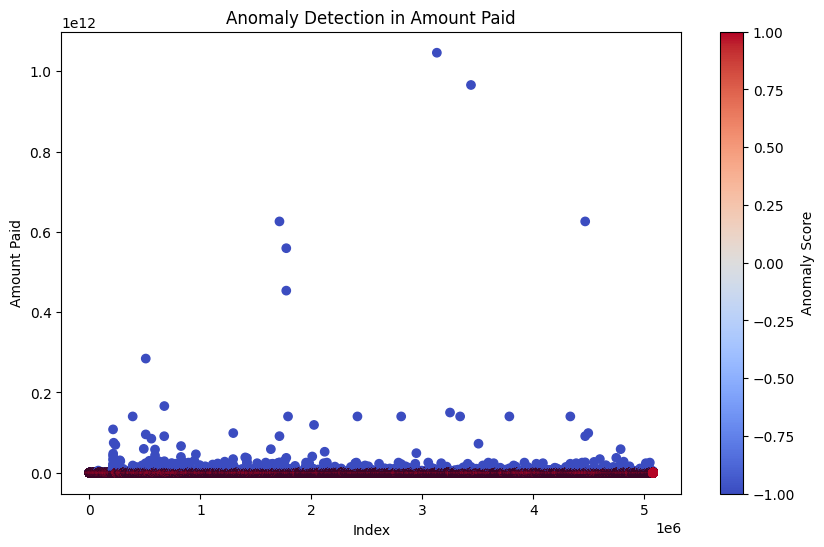

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame hi_df
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency']

X = hi_df[feature_columns]

# Frequency encode high-cardinality categorical features
categorical_features = ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency']

for feature in categorical_features:
    freq_encoding = X[feature].value_counts().to_dict()
    X[feature] = X[feature].map(freq_encoding)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Means Clustering ---
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, determine the optimal number of clusters (e.g., 4)
optimal_clusters = 4

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
hi_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the first few rows with the cluster assignments
print(hi_df.head())

# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hi_df['Cluster'], cmap='viridis')
plt.title('Cluster visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# --- Isolation Forest for Anomaly Detection ---
# Fit the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
hi_df['Anomaly_Score'] = isolation_forest.fit_predict(X_scaled)

# Print the first few rows with the anomaly scores
print(hi_df.head())

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(hi_df.index, hi_df['Amount_Paid'], c=hi_df['Anomaly_Score'], cmap='coolwarm')
plt.title('Anomaly Detection in Amount Paid')
plt.xlabel('Index')
plt.ylabel('Amount Paid')
plt.colorbar(label='Anomaly Score')
plt.show()



c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\agbol\AppData\Local\Temp\ipykernel_9904\2311283106.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning

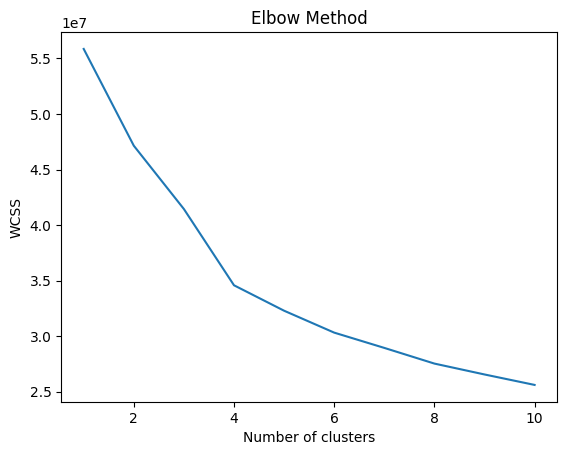

            Timestamp From_Bank From_Account To_Bank To_Account  \
0 2022-09-01 00:20:00        10    8000EBD30      10  8000EBD30   
1 2022-09-01 00:20:00      3208    8000F4580       1  8000F5340   
2 2022-09-01 00:00:00      3209    8000F4670    3209  8000F4670   
3 2022-09-01 00:02:00        12    8000F5030      12  8000F5030   
4 2022-09-01 00:06:00        10    8000F5200      10  8000F5200   

   Amount_Received Receiving_Currency  Amount_Paid Payment_Currency  \
0          3697.34          US Dollar      3697.34        US Dollar   
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.97          US Dollar     36682.97        US Dollar   

  Payment_Format Is_Laundering  Hour  DayOfWeek  Month  Cluster  
0   Reinvestment             0     0          3      9        0  
1         Cheque             0     0  

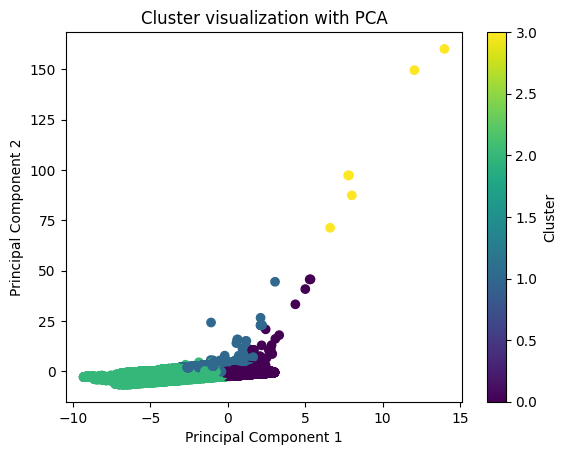

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Assuming the data is loaded into a DataFrame hi_df
hi_df['Timestamp'] = pd.to_datetime(hi_df['Timestamp'])

# Extracting time-related features
hi_df['Hour'] = hi_df['Timestamp'].dt.hour
hi_df['DayOfWeek'] = hi_df['Timestamp'].dt.dayofweek
hi_df['Month'] = hi_df['Timestamp'].dt.month

# Define feature columns
feature_columns = ['From_Bank', 'To_Bank', 'Amount_Received', 'Amount_Paid', 'Hour', 'DayOfWeek', 'Month',
                   'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']

X = hi_df[feature_columns]

# Encode categorical features using Label Encoding
label_encoders = {}
for column in ['From_Bank', 'To_Bank', 'From_Account', 'To_Account', 'Receiving_Currency', 'Payment_Currency', 'Payment_Format']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, determine the optimal number of clusters (e.g., 4)
optimal_clusters = 4

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
hi_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the first few rows with the cluster assignments
print(hi_df.head())

# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hi_df['Cluster'], cmap='viridis')
plt.title('Cluster visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
